<a href="https://colab.research.google.com/github/aiya-yes/3D-genome-model/blob/main/Spatial_vs_genomic_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from itertools import combinations

In [ ]:
# Load the genomic scale data
genomic_scale = pd.read_csv('/users/ayesbola/data/ayesbola/genomic-scale/genomic-scale.tsv', sep='\t')

In [ ]:
genomic_scale.head(10)

,z(nm),x(nm),y(nm),genomic coordinate,homolog number,cell number,experiment number,distance to lamina (nm)
0,2581.0,65180.0,104364.0,chr1:2950000-3050000,1,1,1,1146.0
1,2689.0,64534.0,104147.0,chr1:5950000-6050000,1,1,1,1200.0
2,NaN,NaN,NaN,chr1:8950000-9050000,1,1,1,NaN
3,1370.0,61718.0,105137.0,chr1:11950000-12050000,1,1,1,0.0
4,3983.0,64140.0,105331.0,chr1:14950000-15050000,1,1,1,25.0
5,2100.0,65721.0,103976.0,chr1:17950000-18050000,1,1,1,590.0
6,2769.0,64631.0,105995.0,chr1:20950000-21050000,1,1,1,1243.0
7,2655.0,65551.0,105327.0,chr1:23950000-24050000,1,1,1,1357.0
8,NaN,NaN,NaN,chr1:26950000-27050000,1,1,1,NaN
9,3647.0,64760.0,101780.0,chr1:29950000-30050000,1,1,1,0.0


In [ ]:
import pandas as pd

# Assuming you have already loaded the DataFrame
# genomic_scale = pd.read_csv("your_file.csv")

# Set experiment numbers for comparison
experiment_number_1 = 1
experiment_number_2 = 2

# Filter data for experiment number 1 and experiment number 2
data_exp_1 = genomic_scale[genomic_scale['experiment number'] == experiment_number_1]
data_exp_2 = genomic_scale[genomic_scale['experiment number'] == experiment_number_2]

# Extract chromosome numbers using regular expressions
chromosome_pattern = r'chr(\w+)'
data_exp_1['chromosome_number'] = data_exp_1['genomic coordinate'].str.extract(chromosome_pattern)
data_exp_2['chromosome_number'] = data_exp_2['genomic coordinate'].str.extract(chromosome_pattern)

# Check unique chromosome numbers
unique_chromosomes_exp_1 = data_exp_1['chromosome_number'].unique()
unique_chromosomes_exp_2 = data_exp_2['chromosome_number'].unique()

unique_cell_numbers_exp_1 = data_exp_1['cell number'].unique()
unique_cell_numbers_exp_2 = data_exp_2['cell number'].unique()

unique_homolog_numbers_exp_1 = data_exp_1['homolog number'].unique()
unique_homolog_numbers_exp_2 = data_exp_2['homolog number'].unique()

# Print the results
print("Unique Chromosomes in Experiment 1:", unique_chromosomes_exp_1)
print("Unique Chromosomes in Experiment 2:", unique_chromosomes_exp_2)

print("Unique Cell Numbers in Experiment 1:", unique_cell_numbers_exp_1)
print("Unique Cell Numbers in Experiment 2:", unique_cell_numbers_exp_2)

print("Unique Homolog Numbers in Experiment 1:", unique_homolog_numbers_exp_1)
print("Unique Homolog Numbers in Experiment 2:", unique_homolog_numbers_exp_2)


/gpfs/runtime/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Unique Chromosomes in Experiment 1: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' 'X']
Unique Chromosomes in Experiment 2: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' 'X']
Unique Cell Numbers in Experiment 1: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 1

/gpfs/runtime/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#create a bed file with anchor points
anchor_points = genomic_scale[['cell number', 'homolog number']].copy()

# Extract chromosome number from 'genomic coordinate' column
anchor_points['chromosome'] = genomic_scale['genomic coordinate'].str.extract(r'chr(\w+)')

# Copy the 'z(nm)', 'x(nm)', and 'y(nm)' columns
anchor_points[['z(nm)', 'x(nm)', 'y(nm)']] = genomic_scale[['z(nm)', 'x(nm)', 'y(nm)']].copy()

# Save the anchor_points DataFrame as a BED file
anchor_points.to_csv('anchor_points.bed', sep='\t', header=False, index=False)

# Create a copy of the DataFrame with required columns in the desired order
anchor_points = anchor_points[['z(nm)', 'x(nm)', 'y(nm)', 'cell number', 'chromosome', 'homolog number']].copy()

In [ ]:
anchor_points.head(50)

,z(nm),x(nm),y(nm),cell number,chromosome,homolog number
0,2581.0,65180.0,104364.0,1,1,1
1,2689.0,64534.0,104147.0,1,1,1
2,NaN,NaN,NaN,1,1,1
3,1370.0,61718.0,105137.0,1,1,1
4,3983.0,64140.0,105331.0,1,1,1
5,2100.0,65721.0,103976.0,1,1,1
6,2769.0,64631.0,105995.0,1,1,1
7,2655.0,65551.0,105327.0,1,1,1
8,NaN,NaN,NaN,1,1,1
9,3647.0,64760.0,101780.0,1,1,1


In [ ]:
# Check unique values for 'cell number', 'chromosome', and 'homolog number'
print("Unique cell numbers:", anchor_points['cell number'].unique())
print("Unique chromosomes:", anchor_points['chromosome'].unique())
print("Unique homolog numbers:", anchor_points['homolog number'].unique())


Unique cell numbers: [   1    2    3 ... 1785 1786 1787]
Unique chromosomes: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' 'X']
Unique homolog numbers: [1 2]


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Filter the DataFrame for cell number 1, chromosome 1, and homolog 1
selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                              (anchor_points['chromosome'] == '1') &
                              (anchor_points['homolog number'] == 1)]

# Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
x_values = selected_data['x(nm)'].values
y_values = selected_data['y(nm)'].values
z_values = selected_data['z(nm)'].values

# Create a list to store the pairwise distances for each loci distance
loci_distances = []
pairwise_distances_list = []

# Generate all possible pairs of loci within the subgroup and their respective distances
for i, j in combinations(range(len(x_values)), 2):
    x1, y1, z1 = x_values[i], y_values[i], z_values[i]
    x2, y2, z2 = x_values[j], y_values[j], z_values[j]

    # Calculate the 3D distance between the two loci
    distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

    # Determine the loci distance
    loci_distance = j - i - 1

    # Append the loci distance and pairwise distance to their respective lists
    loci_distances.append(loci_distance)
    pairwise_distances_list.append(distance)

# Create a new DataFrame to store the pairwise distances and loci distances
pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                      '3D distance (nm)': pairwise_distances_list})

# Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

# Convert the grouped result to a DataFrame
grouped_distances_df = grouped_distances.apply(pd.Series)

# Rename the columns to include 'Loci Distance'
grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

# Save the DataFrame to a CSV file without row indices
grouped_distances_df.to_csv('transformed_distances.csv', index=False)

# Save the DataFrame without writing to a CSV file
transformed_distances_1_1_1 = grouped_distances_df.copy()

# Display the transformed DataFrame
transformed_distances_1_1_1

,Loci Distance 0,Loci Distance 1,Loci Distance 2,Loci Distance 3,Loci Distance 4,Loci Distance 5,Loci Distance 6,Loci Distance 7,Loci Distance 8,Loci Distance 9,...,Loci Distance 65,Loci Distance 66,Loci Distance 67,Loci Distance 68,Loci Distance 69,Loci Distance 70,Loci Distance 71,Loci Distance 72,Loci Distance 73,Loci Distance 74
Loci Distance,,,,,,,,,,,,,,,,,,,,,
0,689.978,NaN,NaN,3568.12,2807.36,2389.98,1142.64,NaN,NaN,2673.62,...,NaN,1495.843909,1865.909430,2084.718446,1390.718519,1197.931968,1121.469572,980.347897,983.457676,750.571116
1,NaN,3263.39,NaN,4231.41,1468.26,1470.42,NaN,3767.09,NaN,2301.75,...,NaN,970.307683,2838.557556,1061.326057,1170.733531,668.343475,1579.035782,1428.591264,1054.569106,NaN
2,3748.27,1797.65,NaN,3343.49,1937.66,NaN,4307.41,2328.56,NaN,2707.79,...,NaN,2134.589890,2566.843003,2122.825947,1257.532902,1641.731099,1189.006728,1822.693062,NaN,NaN
3,1995.57,1336.09,NaN,4047.12,NaN,2852.92,2370.74,1943.62,NaN,3527.17,...,NaN,1336.970456,3050.772689,1672.189583,1495.040802,1937.520581,1867.777824,NaN,NaN,NaN
4,821.332,1852.27,NaN,NaN,3620.34,1916.14,2554.17,1857.37,NaN,3583.99,...,NaN,1880.232698,3162.799393,2604.676563,1333.567396,2393.231497,NaN,NaN,NaN,NaN
5,1731.16,1558.15,NaN,5070.3,2329.99,871.386,2119.82,2364.19,NaN,2443.99,...,NaN,1984.240157,4007.398408,2954.212078,1568.824719,NaN,NaN,NaN,NaN,NaN
6,1034.64,NaN,NaN,2610.41,2682.46,1348.43,1933.48,2250.15,NaN,2948.68,...,NaN,2927.714638,4006.114452,3344.529862,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2563.5,NaN,3715.67,2298.36,2511.76,1748.69,3355.48,NaN,3561.34,...,NaN,2965.664512,4397.559550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2826.63,910.931,NaN,2990.61,2027.8,2525.68,3180.23,3127.2,NaN,3270.79,...,NaN,3496.247846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transformed_distances_1_1_1_numeric = transformed_distances_1_1_1.apply(pd.to_numeric, errors='coerce')
spatial_distance_averages_1_1_1 = transformed_distances_1_1_1_numeric.mean(axis=1, skipna=True)

# Print the calculated row averages
spatial_distance_averages_1_1_1

Loci Distance
0     1488.533237
1     1752.686819
2     2013.990898
3     2045.287875
4     2227.166458
5     2285.997355
6     2211.844638
7     2292.929299
8     2298.829338
9     2129.215803
10    2072.536244
11    2102.971256
12    2293.284796
13    2270.678514
14    2339.192896
15    2459.111722
16    2419.988128
17    2180.669844
18    2361.254302
19    2329.542354
20    2487.881537
21    2322.524327
22    2572.815341
23    2438.645347
24    2520.240003
25    2461.653661
26    2498.846035
27    2600.700018
28    2516.057447
29    2636.268059
         ...     
45    2479.152317
46    2270.136644
47    2364.259798
48    2489.836366
49    2472.780311
50    2415.723353
51    2507.861699
52    2314.570679
53    2292.618756
54    2339.722802
55    2507.091389
56    2448.934627
57    2274.994777
58    2215.790662
59    2390.693874
60    2150.225204
61    2362.831929
62    2731.966375
63    2861.284423
64    2810.967176
65    3057.654689
66    2893.011459
67    2495.556305
68    2204.815

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Group the DataFrame by 'cell number', 'chromosome', and 'homolog number'
grouped_data = anchor_points.groupby(['cell number', 'chromosome', 'homolog number'])

# Create a list to store the pairwise distances for each loci distance
loci_distances = []
pairwise_distances_list = []

# Iterate through each subgroup and calculate pairwise distances
for subgroup, data in grouped_data:
    x_values = data['x(nm)'].values
    y_values = data['y(nm)'].values
    z_values = data['z(nm)'].values

    # Generate all possible pairs of loci within the subgroup and their respective distances
    for i, j in combinations(range(len(x_values)), 2):
        x1, y1, z1 = x_values[i], y_values[i], z_values[i]
        x2, y2, z2 = x_values[j], y_values[j], z_values[j]

        # Calculate the 3D distance between the two loci
        distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

        # Determine the loci distance
        loci_distance = j - i - 1

        # Append the loci distance and pairwise distance to their respective lists
        loci_distances.append(loci_distance)
        pairwise_distances_list.append(distance)

# Create a new DataFrame to store the pairwise distances and loci distances
pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                      '3D distance (nm)': pairwise_distances_list})

# Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

# Convert the grouped result to a DataFrame
grouped_distances_df = grouped_distances.apply(pd.Series)

# Calculate the mean for each loci distance
mean_distances = grouped_distances_df.mean(axis=1)

# Create a new DataFrame to store the mean distances
mean_distances_df = pd.DataFrame({'Loci Distance': mean_distances.index,
                                  'Mean 3D distance (nm)': mean_distances.values})

# Save the DataFrame to a CSV file without row indices
mean_distances_df.to_csv('mean_distances.csv', index=False)

# Save the DataFrame without writing to a CSV file
mean_distances_all = mean_distances_df.copy()

# Display the mean distances DataFrame
print(mean_distances_all)

In [ ]:
# Create a new empty DataFrame
average_3D_distances_all = pd.DataFrame()

average_3D_distances_all = average_3D_distances_all.assign(cell1_chr1_hom1=spatial_distance_averages_1_1_1)

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Filter the DataFrame for cell number 1, chromosome 1, and homolog 1
selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                              (anchor_points['chromosome'] == '1') &
                              (anchor_points['homolog number'] == 2)]

# Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
x_values = selected_data['x(nm)'].values
y_values = selected _data['y(nm)'].values
z_values = selected_data['z(nm)'].values

# Create a list to store the pairwise distances for each loci distance
loci_distances = []
pairwise_distances_list = []

# Generate all possible pairs of loci within the subgroup and their respective distances
for i, j in combinations(range(len(x_values)), 2):
    x1, y1, z1 = x_values[i], y_values[i], z_values[i]
    x2, y2, z2 = x_values[j], y_values[j], z_values[j]

    # Calculate the 3D distance between the two loci
    distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

    # Determine the loci distance
    loci_distance = j - i - 1

    # Append the loci distance and pairwise distance to their respective lists
    loci_distances.append(loci_distance)
    pairwise_distances_list.append(distance)

# Create a new DataFrame to store the pairwise distances and loci distances
pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                      '3D distance (nm)': pairwise_distances_list})

# Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

# ...

# Convert the grouped result to a DataFrame
grouped_distances_df = grouped_distances.apply(pd.Series)

# Rename the columns to include 'Loci Distance'
grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

# Save the DataFrame to a CSV file without row indices
grouped_distances_df.to_csv('transformed_distances.csv', index=False)

# Save the DataFrame without writing to a CSV file
transformed_distances_1_1_2 = grouped_distances_df.copy()

# Display the transformed DataFrame
transformed_distances_1_1_2

In [ ]:
transformed_distances_1_1_2_numeric = transformed_distances_1_1_2.apply(pd.to_numeric, errors='coerce')
spatial_distance_averages_1_1_2 = transformed_distances_1_1_2_numeric.mean(axis=1, skipna=True)

# Print the calculated row averages
spatial_distance_averages_1_1_2

Loci Distance
0     1353.094283
1     1516.295011
2     1624.010953
3     1809.173595
4     1985.090889
5     1827.294203
6     1806.883668
7     1851.561296
8     1762.531527
9     2064.250546
10    2127.456778
11    2127.679597
12    2111.479713
13    2213.190884
14    2109.111932
15    2005.378822
16    2138.352635
17    2080.113284
18    2156.110209
19    2190.216681
20    2067.210835
21    2209.405264
22    2126.396661
23    2073.532167
24    2143.110751
25    2373.027823
26    2441.193027
27    2337.364526
28    2429.624156
29    2366.088700
         ...     
45    2078.655363
46    2021.328902
47    2083.951863
48    2187.839914
49    2209.475276
50    2371.642102
51    2382.786944
52    2234.361001
53    2290.449822
54    2135.327084
55    2029.840221
56    1836.606201
57    2196.898357
58    2421.653108
59    2421.221258
60    2215.280435
61    2187.198738
62    1608.237624
63    1469.308082
64    1831.156769
65    2058.617743
66    2258.256620
67    2706.891614
68    2316.793

In [ ]:
average_3D_distances_all = average_3D_distances_all.assign(cell1_chr1_hom2=spatial_distance_averages_1_1_2)

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Filter the DataFrame for cell number 1, chromosome 1, and homolog 1
selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                              (anchor_points['chromosome'] == '3') &
                              (anchor_points['homolog number'] == 1)]

# Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
x_values = selected_data['x(nm)'].values
y_values = selected_data['y(nm)'].values
z_values = selected_data['z(nm)'].values

# Create a list to store the pairwise distances for each loci distance
loci_distances = []
pairwise_distances_list = []

# Generate all possible pairs of loci within the subgroup and their respective distances
for i, j in combinations(range(len(x_values)), 2):
    x1, y1, z1 = x_values[i], y_values[i], z_values[i]
    x2, y2, z2 = x_values[j], y_values[j], z_values[j]

    # Calculate the 3D distance between the two loci
    distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

    # Determine the loci distance
    loci_distance = j - i - 1

    # Append the loci distance and pairwise distance to their respective lists
    loci_distances.append(loci_distance)
    pairwise_distances_list.append(distance)

# Create a new DataFrame to store the pairwise distances and loci distances
pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                      '3D distance (nm)': pairwise_distances_list})

# Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

# Convert the grouped result to a DataFrame
grouped_distances_df = grouped_distances.apply(pd.Series)

# Rename the columns to include 'Loci Distance'
grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

# Save the DataFrame to a CSV file without row indices
grouped_distances_df.to_csv('transformed_distances.csv', index=False)

# Save the DataFrame without writing to a CSV file
transformed_distances_1_3_1 = grouped_distances_df.copy()

transformed_distances_1_3_1_numeric = transformed_distances_1_3_1.apply(pd.to_numeric, errors='coerce')
spatial_distance_averages_1_3_1 = transformed_distances_1_3_1_numeric.mean(axis=1, skipna=True)

average_3D_distances_all = average_3D_distances_all.assign(cell1_chr3_hom1=spatial_distance_averages_1_3_1)

In [ ]:
average_3D_distances_all.head(100)

,cell1_chr1_hom1,cell1_chr1_hom2,cell1_chr2_hom1,cell1_chr2_hom2,cell1_chr3_hom1,cell1_chr3_hom2,cell1_chr4_hom1,cell1_chr4_hom2,cell1_chr5_hom1,cell1_chr5_hom2,...,cell1_chr19_hom1,cell1_chr19_hom2,cell1_chr20_hom1,cell1_chr20_hom2,cell1_chr21_hom1,cell1_chr21_hom2,cell1_chr22_hom1,cell1_chr22_hom2,cell1_chrX_hom1,cell1_chrX_hom2
Loci Distance,,,,,,,,,,,,,,,,,,,,,
0,1488.533237,1353.094283,1153.782799,1084.392892,1114.284262,1247.867672,1389.649805,1153.500780,1165.805192,1357.139034,...,1301.711697,995.552060,1397.003113,1149.166230,1559.683286,873.232184,1118.931242,1077.074445,1272.807215,1274.069028
1,1752.686819,1516.295011,1435.628824,1444.636264,1573.787806,1537.111648,1693.312937,1363.884655,1257.112058,1591.728940,...,1927.786422,1261.731594,1637.106472,1323.710006,1799.518817,1071.521625,1610.763427,1385.706715,1293.173552,1879.676129
2,2013.990898,1624.010953,1702.494344,1505.678168,1644.430329,1774.390351,1872.989076,1554.519581,1373.770605,1734.064023,...,2064.028119,1603.252705,1978.719641,1303.898532,2005.775040,1061.991215,2028.373784,1571.192565,1505.193145,2137.534629
3,2045.287875,1809.173595,1812.366884,1610.917284,1775.445583,1849.527014,1942.001376,1631.827244,1411.160294,1902.920462,...,2298.051603,1914.392061,2125.117750,1418.043562,2223.171994,1121.109460,2433.887910,1775.783891,1421.675106,2277.062619
4,2227.166458,1985.090889,1952.041710,1800.410642,1920.210567,1837.170429,2053.415166,1665.754590,1473.144920,1935.998099,...,2607.941119,2136.610154,2258.111302,1402.379132,2144.299222,1264.458478,2625.330076,1942.717819,1368.507680,2127.362072
5,2285.997355,1827.294203,2022.422906,1835.686145,1920.846653,1887.480420,2165.966900,1737.013316,1558.866912,1974.949713,...,2722.135807,2189.096866,1965.118363,1564.267228,2005.957337,1159.790152,2634.966611,2179.284722,1348.239860,2007.054670
6,2211.844638,1806.883668,2053.270254,1757.963639,1864.015064,1845.070174,2049.710415,1750.767308,1627.486370,2035.138751,...,2700.458958,1933.439172,1800.455186,1538.694473,2099.037400,1180.780510,2594.007295,2213.118160,1407.443274,2069.612443
7,2292.929299,1851.561296,1993.433836,2010.335926,1935.817053,1758.034277,2184.714220,1807.068782,1712.424771,1874.619233,...,2547.186826,2026.936978,1678.141757,1515.269564,2302.561362,1357.055746,2456.317457,2124.939712,1522.535459,2135.252700
8,2298.829338,1762.531527,1960.476648,2001.487186,2011.027192,1913.567492,2293.025418,1753.097753,1845.619910,1795.968148,...,2419.250367,2342.997403,2016.356322,1700.977576,2518.817010,1421.837868,2353.946770,2097.554238,1452.781033,2408.839447


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Initialize the DataFrame to store the average 3D distances
average_3D_distances_all = pd.DataFrame()

# Iterate over all chromosomes
for chromosome in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', 'X']:
    # Iterate over both homologs
    for homolog in [1, 2]:
        # Filter the DataFrame for cell number 1, chromosome, and homolog
        selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                                      (anchor_points['chromosome'] == chromosome) &
                                      (anchor_points['homolog number'] == homolog)]

        # Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
        x_values = selected_data['x(nm)'].values
        y_values = selected_data['y(nm)'].values
        z_values = selected_data['z(nm)'].values

        # Create a list to store the pairwise distances for each loci distance
        loci_distances = []
        pairwise_distances_list = []

        # Generate all possible pairs of loci within the subgroup and their respective distances
        for i, j in combinations(range(len(x_values)), 2):
            x1, y1, z1 = x_values[i], y_values[i], z_values[i]
            x2, y2, z2 = x_values[j], y_values[j], z_values[j]

            # Calculate the 3D distance between the two loci
            distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

            # Determine the loci distance
            loci_distance = j - i - 1

            # Append the loci distance and pairwise distance to their respective lists
            loci_distances.append(loci_distance)
            pairwise_distances_list.append(distance)

        # Create a new DataFrame to store the pairwise distances and loci distances
        pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                              '3D distance (nm)': pairwise_distances_list})

        # Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
        grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

        # Convert the grouped result to a DataFrame
        grouped_distances_df = grouped_distances.apply(pd.Series)

        # Rename the columns to include 'Loci Distance'
        grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

        # Calculate the average 3D distance for each loci distance
        transformed_distances_numeric = grouped_distances_df.apply(pd.to_numeric, errors='coerce')
        spatial_distance_averages = transformed_distances_numeric.mean(axis=1, skipna=True)

        # Append the average 3D distances to the DataFrame
        column_name = f'cell1_chr{chromosome}_hom{homolog}'
        # Assign the average 3D distances to the DataFrame
        average_3D_distances_all = average_3D_distances_all.assign(**{column_name:spatial_distance_averages})

# Now you can work with the resulting average_3D_distances_all DataFrame
# which contains the average 3D distances for each combination of cell, chromosome, and homolog.

In [ ]:
average_3D_distances_all.head(10)

,cell1_chr1_hom1,cell1_chr1_hom2,cell1_chr2_hom1,cell1_chr2_hom2,cell1_chr3_hom1,cell1_chr3_hom2,cell1_chr4_hom1,cell1_chr4_hom2,cell1_chr5_hom1,cell1_chr5_hom2,...,cell1_chr19_hom1,cell1_chr19_hom2,cell1_chr20_hom1,cell1_chr20_hom2,cell1_chr21_hom1,cell1_chr21_hom2,cell1_chr22_hom1,cell1_chr22_hom2,cell1_chrX_hom1,cell1_chrX_hom2
Loci Distance,,,,,,,,,,,,,,,,,,,,,
0,1488.533237,1353.094283,1153.782799,1084.392892,1114.284262,1247.867672,1389.649805,1153.500780,1165.805192,1357.139034,...,1301.711697,995.552060,1397.003113,1149.166230,1559.683286,873.232184,1118.931242,1077.074445,1272.807215,1274.069028
1,1752.686819,1516.295011,1435.628824,1444.636264,1573.787806,1537.111648,1693.312937,1363.884655,1257.112058,1591.728940,...,1927.786422,1261.731594,1637.106472,1323.710006,1799.518817,1071.521625,1610.763427,1385.706715,1293.173552,1879.676129
2,2013.990898,1624.010953,1702.494344,1505.678168,1644.430329,1774.390351,1872.989076,1554.519581,1373.770605,1734.064023,...,2064.028119,1603.252705,1978.719641,1303.898532,2005.775040,1061.991215,2028.373784,1571.192565,1505.193145,2137.534629
3,2045.287875,1809.173595,1812.366884,1610.917284,1775.445583,1849.527014,1942.001376,1631.827244,1411.160294,1902.920462,...,2298.051603,1914.392061,2125.117750,1418.043562,2223.171994,1121.109460,2433.887910,1775.783891,1421.675106,2277.062619
4,2227.166458,1985.090889,1952.041710,1800.410642,1920.210567,1837.170429,2053.415166,1665.754590,1473.144920,1935.998099,...,2607.941119,2136.610154,2258.111302,1402.379132,2144.299222,1264.458478,2625.330076,1942.717819,1368.507680,2127.362072
5,2285.997355,1827.294203,2022.422906,1835.686145,1920.846653,1887.480420,2165.966900,1737.013316,1558.866912,1974.949713,...,2722.135807,2189.096866,1965.118363,1564.267228,2005.957337,1159.790152,2634.966611,2179.284722,1348.239860,2007.054670
6,2211.844638,1806.883668,2053.270254,1757.963639,1864.015064,1845.070174,2049.710415,1750.767308,1627.486370,2035.138751,...,2700.458958,1933.439172,1800.455186,1538.694473,2099.037400,1180.780510,2594.007295,2213.118160,1407.443274,2069.612443
7,2292.929299,1851.561296,1993.433836,2010.335926,1935.817053,1758.034277,2184.714220,1807.068782,1712.424771,1874.619233,...,2547.186826,2026.936978,1678.141757,1515.269564,2302.561362,1357.055746,2456.317457,2124.939712,1522.535459,2135.252700
8,2298.829338,1762.531527,1960.476648,2001.487186,2011.027192,1913.567492,2293.025418,1753.097753,1845.619910,1795.968148,...,2419.250367,2342.997403,2016.356322,1700.977576,2518.817010,1421.837868,2353.946770,2097.554238,1452.781033,2408.839447


In [ ]:
# Calculate the average for each row and store it in a new DataFrame
average_3D_distances_summary = pd.DataFrame()
average_3D_distances_summary['Average'] = average_3D_distances_all.mean(axis=1)

# Calculate the standard deviation for each row and add it to the new DataFrame
average_3D_distances_summary['Standard Deviation'] = average_3D_distances_all.std(axis=1)

# Reset the index of the new DataFrame
average_3D_distances_summary = average_3D_distances_summary.reset_index()

# Rename the 'Loci Distance' column to match your desired output
average_3D_distances_summary = average_3D_distances_summary.rename(columns={'Loci Distance': 'Loci Distance (Average)'})


In [ ]:
average_3D_distances_summary

,Loci Distance (Average),Average,Standard Deviation
0,0,1281.868392,222.098715
1,1,1574.389814,262.698073
2,2,1723.146055,273.135593
3,3,1842.307346,319.383683
4,4,1906.805562,344.609851
5,5,1939.892212,357.422578
6,6,1949.509114,337.974107
7,7,2000.888198,321.744291
8,8,2042.215359,293.609301
9,9,2078.471912,311.402389


In [ ]:
# Open the CSV file as a DataFrame
distances = pd.read_csv("distances.csv")

# Filter the DataFrame based on the specified conditions
filtered_distances = distances[(distances["chromosome"] == "chr1") &
                               (distances["cell number"] == 1) &
                               (distances["homolog number"] == 1)].copy()  # Make a copy of the filtered DataFrame

# Print the filtered DataFrame
filtered_distances.head(10)

,chromosome,start position,end position,cell number,homolog number
0,chr1,3050000,5950000,1,1
1,chr1,6050000,8950000,1,1
2,chr1,9050000,11950000,1,1
3,chr1,12050000,14950000,1,1
4,chr1,15050000,17950000,1,1
5,chr1,18050000,20950000,1,1
6,chr1,21050000,23950000,1,1
7,chr1,24050000,26950000,1,1
8,chr1,27050000,29950000,1,1
9,chr1,30050000,32950000,1,1


In [ ]:
# Calculate the differences between end position and start position
filtered_distances["Difference"] = filtered_distances["end position"] - filtered_distances["start position"]

# Calculate the cumulative sum of the differences
filtered_distances["Cumulative Sum"] = filtered_distances["Difference"].cumsum()

# Print the modified DataFrame
filtered_distances["Cumulative Sum"]


0       2900000
1       5800000
2       8700000
3      11600000
4      14500000
5      17400000
6      20300000
7      23200000
8      26100000
9      29000000
10     31900000
11     34800000
12     37700000
13     40600000
14     43500000
15     46400000
16     49300000
17     52200000
18     55100000
19     58000000
20     60900000
21     63800000
22     66700000
23     69600000
24     72500000
25     75400000
26     78300000
27     81200000
28     84100000
29     87000000
        ...    
45    151400000
46    154300000
47    157200000
48    160100000
49    163000000
50    165900000
51    168800000
52    171700000
53    174600000
54    177500000
55    180400000
56    183300000
57    186200000
58    189100000
59    192000000
60    194900000
61    197800000
62    200700000
63    203600000
64    206500000
65    209400000
66    212300000
67    215200000
68    218100000
69    221000000
70    223900000
71    226800000
72    229700000
73    232600000
74    235500000
Name: Cumulative Sum, Le

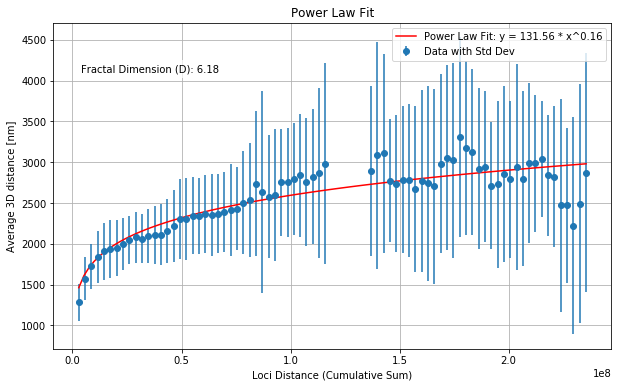

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Assuming you have the 'average_3D_distances_summary' DataFrame
# Extract the loci distances, averages, and standard deviations
loci_distances = filtered_distances['Cumulative Sum'].values
averages = average_3D_distances_summary['Average'].values
std_devs = average_3D_distances_summary['Standard Deviation'].values

# Fit the power law equation to the data (you can adjust this part if needed)
params, covariance = curve_fit(power_law, loci_distances, averages)
a, b = params
fractal_dimension = 1.0 / b  # Calculate fractal dimension

# Generate x values for the power law curve
x_fit_curve = np.linspace(min(loci_distances), max(loci_distances), 100)
y_fit_curve = power_law(x_fit_curve, a, b)

# Create the plot with error bars for standard deviations
plt.figure(figsize=(10, 6))
plt.errorbar(loci_distances, averages, yerr=std_devs, fmt='o', label="Data with Std Dev")
plt.plot(x_fit_curve, y_fit_curve, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Loci Distance (Cumulative Sum)")
plt.ylabel("Average 3D distance [nm]")
plt.title("Power Law Fit")
plt.text(0.05, 0.85, f"Fractal Dimension (D): {fractal_dimension:.2f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()


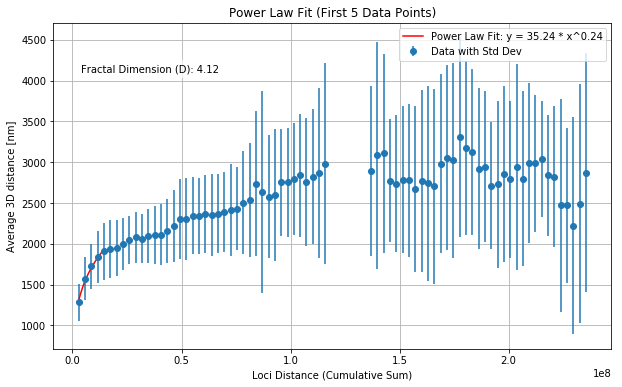

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Assuming you have the 'average_3D_distances_summary' DataFrame
# Extract the loci distances, averages, and standard deviations
loci_distances = filtered_distances['Cumulative Sum'].values
averages = average_3D_distances_summary['Average'].values
std_devs = average_3D_distances_summary['Standard Deviation'].values

# Use only the first 5 data points for fitting
loci_distances_fit = loci_distances[:5]
averages_fit = averages[:5]

# Fit the power law equation to the first 5 data points
params, covariance = curve_fit(power_law, loci_distances_fit, averages_fit)
a, b = params
fractal_dimension = 1.0 / b  # Calculate fractal dimension

# Generate x values for the power law curve
x_fit_curve = np.linspace(min(loci_distances_fit), max(loci_distances_fit), 100)
y_fit_curve = power_law(x_fit_curve, a, b)

# Create the plot with error bars for standard deviations
plt.figure(figsize=(10, 6))
plt.errorbar(loci_distances, averages, yerr=std_devs, fmt='o', label="Data with Std Dev")
plt.plot(x_fit_curve, y_fit_curve, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Loci Distance (Cumulative Sum)")
plt.ylabel("Average 3D distance [nm]")
plt.title("Power Law Fit (First 5 Data Points)")
plt.text(0.05, 0.85, f"Fractal Dimension (D): {fractal_dimension:.2f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()


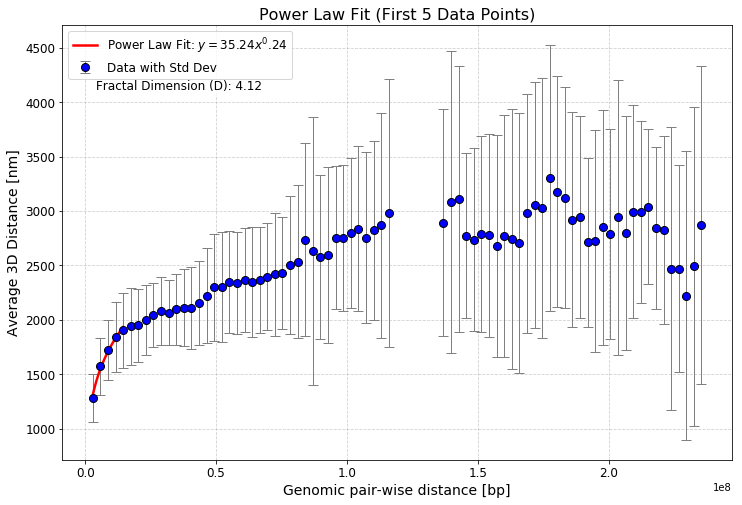

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Assuming you have the 'average_3D_distances_summary' DataFrame
# Extract the loci distances, averages, and standard deviations
loci_distances = filtered_distances['Cumulative Sum'].values
averages = average_3D_distances_summary['Average'].values
std_devs = average_3D_distances_summary['Standard Deviation'].values

# Use only the first 5 data points for fitting
loci_distances_fit = loci_distances[:5]
averages_fit = averages[:5]

# Fit the power law equation to the first 5 data points
params, covariance = curve_fit(power_law, loci_distances_fit, averages_fit)
a, b = params
fractal_dimension = 1.0 / b  # Calculate fractal dimension

# Generate x values for the power law curve
x_fit_curve = np.linspace(min(loci_distances_fit), max(loci_distances_fit), 100)
y_fit_curve = power_law(x_fit_curve, a, b)

# Create a beautiful and colorful plot
plt.figure(figsize=(12, 8))
plt.errorbar(
    loci_distances,
    averages,
    yerr=std_devs,
    fmt='o',
    color='blue',
    markersize=8,
    markeredgecolor='black',
    ecolor='gray',
    elinewidth=1,
    capsize=5,
    label="Data with Std Dev",
)
plt.plot(
    x_fit_curve,
    y_fit_curve,
    color="red",
    linewidth=2.5,
    label=f"Power Law Fit: $y = {a:.2f} x^{b:.2f}$",
)

# Customize the appearance
plt.xlabel("Genomic Pair-wise Distance [bp]", fontsize=14)
plt.ylabel("Average 3D Distance [nm]", fontsize=14)
plt.title("Power Law Fit (First 5 Data Points)", fontsize=16)
plt.text(
    0.05,
    0.85,
    f"Fractal Dimension (D): {fractal_dimension:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7),
)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(axis='both', which='both', labelsize=12)

# Show the plot
plt.show()


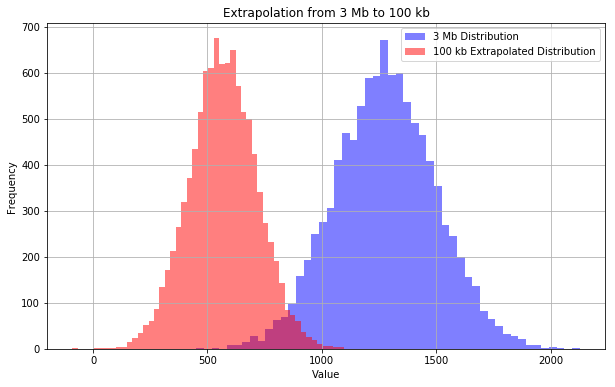

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# Generate random data points from the known distribution (you may have actual data)
np.random.seed(0)
data_3Mb = np.random.normal(mean_3Mb, std_dev_3Mb, 10000)  # Simulated data

# Define the scale factor for extrapolation (3 Mb to 100 kb)
#scale_factor = 30  # 3 Mb / 100 kb
#D = [3mb/100kb]**0.2
scale_factor = 30**0.24

# Calculate the parameters for the extrapolated distribution
mean_100kb = mean_3Mb / scale_factor
std_dev_100kb = std_dev_3Mb / np.sqrt(scale_factor)  # Adjust for scale

# Generate random data points for the extrapolated distribution
data_100kb = np.random.normal(mean_100kb, std_dev_100kb, 10000)  # Simulated data

# Plot histograms of both distributions
plt.figure(figsize=(10, 6))
plt.hist(data_3Mb, bins=50, alpha=0.5, color='blue', label='3 Mb Distribution')
plt.hist(data_100kb, bins=50, alpha=0.5, color='red', label='100 kb Extrapolated Distribution')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Extrapolation from 3 Mb to 100 kb")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mean_100kb, std_dev_100kb

(566.6753712375362, 147.6697349202395)

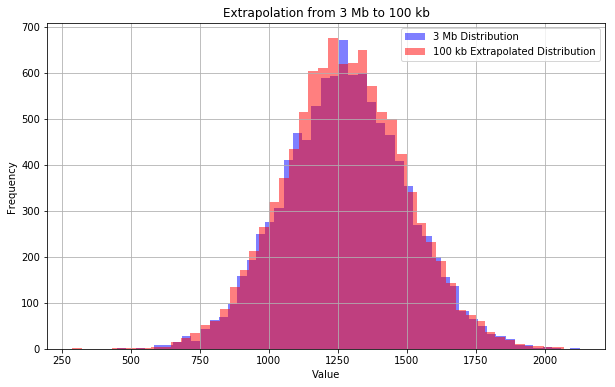

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# Generate random data points from the known distribution (you may have actual data)
np.random.seed(0)
data_3Mb = np.random.normal(mean_3Mb, std_dev_3Mb, 10000)  # Simulated data

# Define the scale factor for extrapolation (3 Mb to 100 kb)
#scale_factor = 30  # 3 Mb / 2900 kb
#D = [3mb/2900kb]**0.2
scale_factor = 1.034**0.2

# Calculate the parameters for the extrapolated distribution
mean_100kb = mean_3Mb / scale_factor
std_dev_100kb = std_dev_3Mb / np.sqrt(scale_factor)  # Adjust for scale

# Generate random data points for the extrapolated distribution
data_100kb = np.random.normal(mean_100kb, std_dev_100kb, 10000)  # Simulated data

# Plot histograms of both distributions
plt.figure(figsize=(10, 6))
plt.hist(data_3Mb, bins=50, alpha=0.5, color='blue', label='3 Mb Distribution')
plt.hist(data_100kb, bins=50, alpha=0.5, color='red', label='100 kb Extrapolated Distribution')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Extrapolation from 3 Mb to 100 kb")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mean_100kb, std_dev_100kb

(1273.3251913028694, 221.35737294039376)

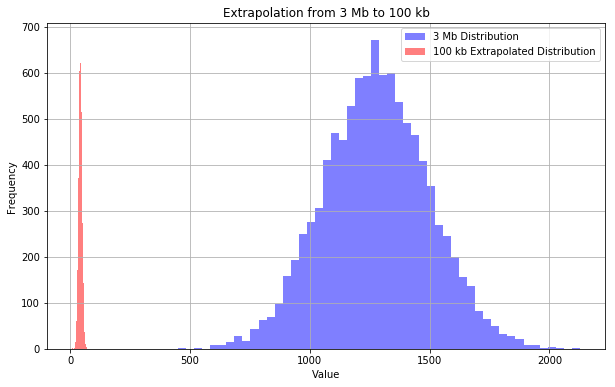

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# Generate random data points from the known distribution (you may have actual data)
np.random.seed(0)
data_3Mb = np.random.normal(mean_3Mb, std_dev_3Mb, 10000)  # Simulated data

# Define the scale factor for extrapolation (3 Mb to 100 kb)
scale_factor = 30  # 3 Mb / 100 kb

# Calculate the parameters for the extrapolated distribution
mean_100kb = mean_3Mb / scale_factor
std_dev_100kb = std_dev_3Mb / scale_factor  # Adjust for scale

# Generate random data points for the extrapolated distribution
data_100kb = np.random.normal(mean_100kb, std_dev_100kb, 10000)  # Simulated data

# Plot histograms of both distributions
plt.figure(figsize=(10, 6))
plt.hist(data_3Mb, bins=50, alpha=0.5, color='blue', label='3 Mb Distribution')
plt.hist(data_100kb, bins=50, alpha=0.5, color='red', label='100 kb Extrapolated Distribution')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Extrapolation from 3 Mb to 100 kb")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mean_100kb, std_dev_100kb

(42.728946400000005, 7.4032905)

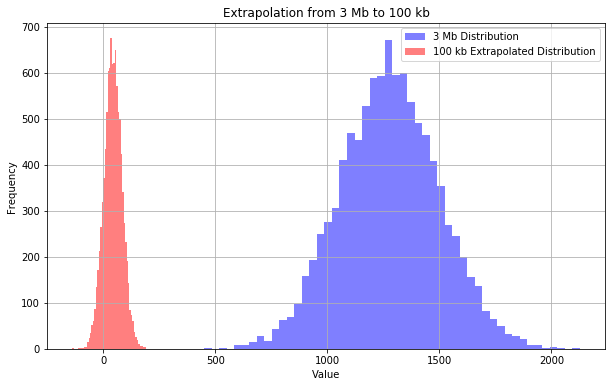

(43.174504456967625, 40.267862907129015)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# Generate random data points from the known distribution (you may have actual data)
np.random.seed(0)
data_3Mb = np.random.normal(mean_3Mb, std_dev_3Mb, 10000)  # Simulated data

# Define the scale factor for extrapolation (3 Mb to 100 kb)
scale_factor = 30  # 3 Mb / 100 kb

# Calculate the parameters for the extrapolated distribution
mean_100kb = mean_3Mb / scale_factor
std_dev_100kb = std_dev_3Mb / np.sqrt(scale_factor)  # Adjust for scale

# Generate random data points for the extrapolated distribution
data_100kb = np.random.normal(mean_100kb, std_dev_100kb, 10000)  # Simulated data

# Calculate mean and standard deviation for 100 kb distribution
mean_100kb_calculated = np.mean(data_100kb)
std_dev_100kb_calculated = np.std(data_100kb)

# Plot histograms of both distributions
plt.figure(figsize=(10, 6))
plt.hist(data_3Mb, bins=50, alpha=0.5, color='blue', label='3 Mb Distribution')
plt.hist(data_100kb, bins=50, alpha=0.5, color='red', label='100 kb Extrapolated Distribution')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Extrapolation from 3 Mb to 100 kb")
plt.legend()
plt.grid(True)
plt.show()

# Return mean and standard deviation for 100 kb distribution
mean_100kb_calculated, std_dev_100kb_calculated

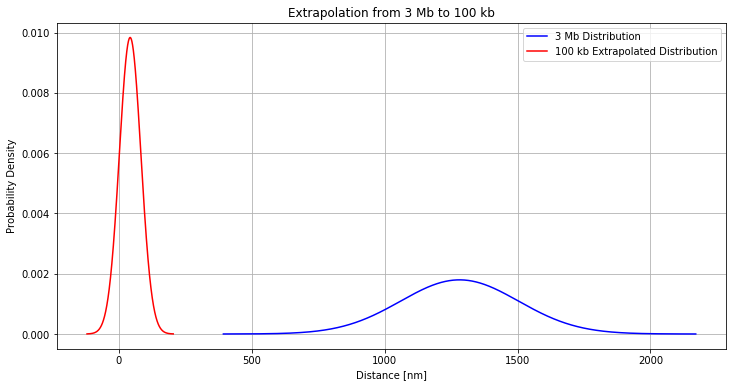

(42.728946400000005, 40.549492066137)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Precalculated parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# 1. Extract actual 3 Mb distances (assuming they are in the first row of average_3D_distances_all)
actual_distances_3Mb = average_3D_distances_all.iloc[0].values

# 2. Use the precalculated mean and standard deviation for the 3 Mb distribution
# 3. Generate PDF for 3 Mb distribution
x_3Mb = np.linspace(mean_3Mb - 4 * std_dev_3Mb, mean_3Mb + 4 * std_dev_3Mb, 10000)
y_3Mb = norm.pdf(x_3Mb, mean_3Mb, std_dev_3Mb)

# 4. Extrapolate PDF for 100 kb
scale_factor = 30  # 3 Mb / 100 kb
mean_100kb = mean_3Mb / scale_factor
std_dev_100kb = std_dev_3Mb / np.sqrt(scale_factor)
x_100kb = np.linspace(mean_100kb - 4 * std_dev_100kb, mean_100kb + 4 * std_dev_100kb, 10000)
y_100kb = norm.pdf(x_100kb, mean_100kb, std_dev_100kb)

# 5. Calculate mean and standard deviation for 100 kb distribution
mean_100kb_calculated = mean_100kb
std_dev_100kb_calculated = std_dev_100kb

# 6. Plot both distributions and return mean and standard deviation for 100 kb
plt.figure(figsize=(12, 6))
plt.plot(x_3Mb, y_3Mb, label='3 Mb Distribution', color='blue')
plt.plot(x_100kb, y_100kb, label='100 kb Extrapolated Distribution', color='red')
plt.xlabel('Distance [nm]')
plt.ylabel('Probability Density')
plt.title('Extrapolation from 3 Mb to 100 kb')
plt.legend()
plt.grid(True)
plt.show()

mean_100kb_calculated, std_dev_100kb_calculated


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Precalculated parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# 1. Extract actual 3 Mb distances (assuming they are in the first row of average_3D_distances_all)
actual_distances_3Mb = average_3D_distances_all.iloc[0].values

# 2. Use the precalculated mean and standard deviation for the 3 Mb distribution
# 3. Generate PDF for 3 Mb distribution
x_3Mb = np.linspace(mean_3Mb - 4 * std_dev_3Mb, mean_3Mb + 4 * std_dev_3Mb, 10000)
y_3Mb = norm.pdf(x_3Mb, mean_3Mb, std_dev_3Mb)

# 4. Extrapolate PDF for 100 kb
scale_factor = 30  # 3 Mb / 100 kb
mean_100kb = mean_3Mb / scale_factor
std_dev_100kb = std_dev_3Mb / np.sqrt(scale_factor)
x_100kb = np.linspace(mean_100kb - 4 * std_dev_100kb, mean_100kb + 4 * std_dev_100kb, 10000)
y_100kb = norm.pdf(x_100kb, mean_100kb, std_dev_100kb)

# 5. Calculate mean and standard deviation for 100 kb distribution
mean_100kb_calculated = mean_100kb
std_dev_100kb_calculated = std_dev_100kb

# 6. Save the data to a CSV file
data_to_save = pd.DataFrame({'Distance': x_100kb, 'PDF': y_100kb})
data_to_save.to_csv('100kb_distribution.csv', index=False)

mean_100kb_calculated, std_dev_100kb_calculated


(42.728946400000005, 40.549492066137)

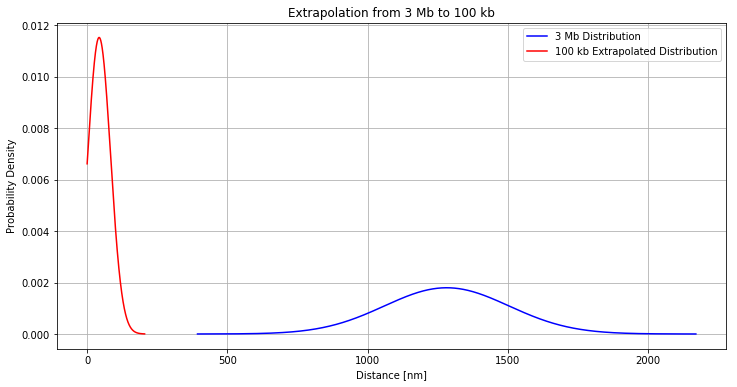

(42.728946400000005, 40.549492066137)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Precalculated parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# 1. Extract actual 3 Mb distances (assuming they are in the first row of average_3D_distances_all)
actual_distances_3Mb = average_3D_distances_all.iloc[0].values

# 2. Use the precalculated mean and standard deviation for the 3 Mb distribution
# 3. Generate PDF for 3 Mb distribution
x_3Mb = np.linspace(mean_3Mb - 4 * std_dev_3Mb, mean_3Mb + 4 * std_dev_3Mb, 10000)
y_3Mb = norm.pdf(x_3Mb, mean_3Mb, std_dev_3Mb)

# 4. Extrapolate PDF for 100 kb using a truncated normal distribution
scale_factor = 30  # 3 Mb / 100 kb
mean_100kb = mean_3Mb / scale_factor
std_dev_100kb = max(std_dev_3Mb / np.sqrt(scale_factor), 1)  # Ensure std_dev_100kb is not less than 1

# Create a truncated normal distribution for 100 kb with lower bound 0
lower_bound = 0
x_100kb = np.linspace(lower_bound, mean_100kb + 4 * std_dev_100kb, 10000)
y_100kb = truncnorm.pdf(x_100kb, (lower_bound - mean_100kb) / std_dev_100kb, np.inf, loc=mean_100kb, scale=std_dev_100kb)

# 5. Calculate mean and standard deviation for 100 kb distribution
mean_100kb_calculated = mean_100kb
std_dev_100kb_calculated = std_dev_100kb

# 6. Plot both distributions and return mean and standard deviation for 100 kb
plt.figure(figsize=(12, 6))
plt.plot(x_3Mb, y_3Mb, label='3 Mb Distribution', color='blue')
plt.plot(x_100kb, y_100kb, label='100 kb Extrapolated Distribution', color='red')
plt.xlabel('Distance [nm]')
plt.ylabel('Probability Density')
plt.title('Extrapolation from 3 Mb to 100 kb')
plt.legend()
plt.grid(True)
plt.show()

mean_100kb_calculated, std_dev_100kb_calculated


In [ ]:
import numpy as np

# Mean and standard deviation for the truncated 100 kb distribution
mean_100kb_saved = mean_100kb_calculated
std_dev_100kb_saved = std_dev_100kb_calculated

# Save the mean and standard deviation as NumPy binary files
np.save('mean_100kb.npy', mean_100kb_saved)
np.save('std_dev_100kb.npy', std_dev_100kb_saved)


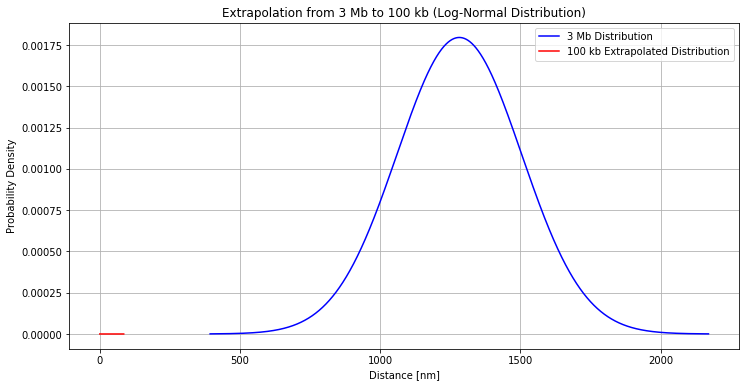

(1281.8683919999999, 222.0987150000003)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Precalculated parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# 1. Extract actual 3 Mb distances (assuming they are in the first row of average_3D_distances_all)
actual_distances_3Mb = average_3D_distances_all.iloc[0].values

# 2. Use the precalculated mean and standard deviation for the 3 Mb distribution
# 3. Generate PDF for 3 Mb distribution
x_3Mb = np.linspace(mean_3Mb - 4 * std_dev_3Mb, mean_3Mb + 4 * std_dev_3Mb, 10000)
y_3Mb = norm.pdf(x_3Mb, mean_3Mb, std_dev_3Mb)

# 4. Extrapolate PDF for 100 kb using a log-normal distribution
scale_factor = 30  # 3 Mb / 100 kb
mean_log = np.log(mean_3Mb) - 0.5 * np.log(1 + (std_dev_3Mb / mean_3Mb)**2)
std_dev_log = np.sqrt(np.log(1 + (std_dev_3Mb / mean_3Mb)**2))

# Create a log-normal distribution for 100 kb with a truncation point at 0
x_100kb = np.linspace(0, mean_3Mb / scale_factor * 2, 10000)  # Adjust the range as needed
y_100kb = lognorm.pdf(x_100kb, std_dev_log, loc=0, scale=np.exp(mean_log))

# 5. Calculate mean and standard deviation for 100 kb distribution
mean_100kb_calculated = np.exp(mean_log + (std_dev_log**2) / 2)
std_dev_100kb_calculated = np.sqrt((np.exp(std_dev_log**2) - 1) * np.exp(2 * mean_log + std_dev_log**2))

# 6. Plot both distributions and return mean and standard deviation for 100 kb
plt.figure(figsize=(12, 6))
plt.plot(x_3Mb, y_3Mb, label='3 Mb Distribution', color='blue')
plt.plot(x_100kb, y_100kb, label='100 kb Extrapolated Distribution', color='red')
plt.xlabel('Distance [nm]')
plt.ylabel('Probability Density')
plt.title('Extrapolation from 3 Mb to 100 kb (Log-Normal Distribution)')
plt.legend()
plt.grid(True)
plt.show()

mean_100kb_calculated, std_dev_100kb_calculated


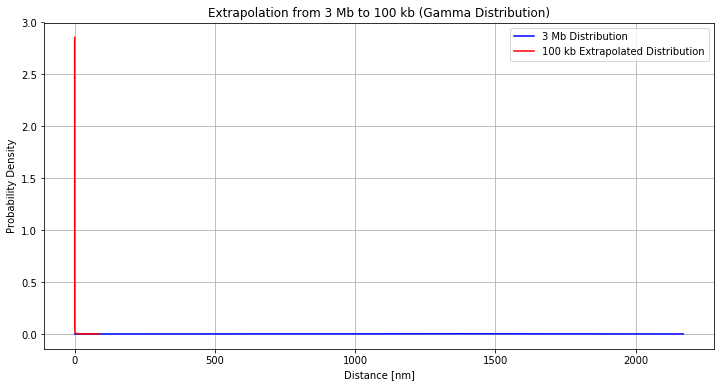

(42.72894640000001, 222.09871500000003)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Precalculated parameters for the known 3 Mb distribution (mean and standard deviation)
mean_3Mb = 1281.868392  # 3 Mb in base pairs
std_dev_3Mb = 222.098715  # Standard deviation for 3 Mb in base pairs

# 1. Extract actual 3 Mb distances (assuming they are in the first row of average_3D_distances_all)
actual_distances_3Mb = average_3D_distances_all.iloc[0].values

# 2. Use the precalculated mean and standard deviation for the 3 Mb distribution
# 3. Generate PDF for 3 Mb distribution
x_3Mb = np.linspace(0, mean_3Mb + 4 * std_dev_3Mb, 10000)  # Adjust the range as needed
y_3Mb = norm.pdf(x_3Mb, mean_3Mb, std_dev_3Mb)

# 4. Extrapolate PDF for 100 kb using a gamma distribution
scale_factor = 30  # 3 Mb / 100 kb
k = (mean_3Mb / scale_factor)**2 / (std_dev_3Mb**2)
theta = (std_dev_3Mb**2) / (mean_3Mb / scale_factor)

# Create a gamma distribution for 100 kb
x_100kb = np.linspace(0, mean_3Mb / scale_factor * 2, 10000)  # Adjust the range as needed
y_100kb = gamma.pdf(x_100kb, a=k, scale=theta)

# 5. Calculate mean and standard deviation for 100 kb distribution
mean_100kb_calculated = k * theta
std_dev_100kb_calculated = np.sqrt(k * theta**2)

# 6. Plot both distributions and return mean and standard deviation for 100 kb
plt.figure(figsize=(12, 6))
plt.plot(x_3Mb, y_3Mb, label='3 Mb Distribution', color='blue')
plt.plot(x_100kb, y_100kb, label='100 kb Extrapolated Distribution', color='red')
plt.xlabel('Distance [nm]')
plt.ylabel('Probability Density')
plt.title('Extrapolation from 3 Mb to 100 kb (Gamma Distribution)')
plt.legend()
plt.grid(True)
plt.show()

mean_100kb_calculated, std_dev_100kb_calculated


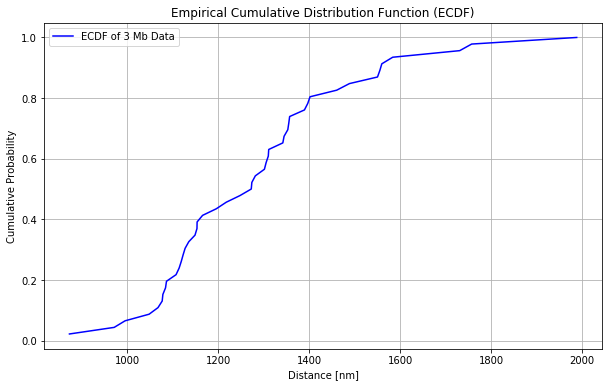

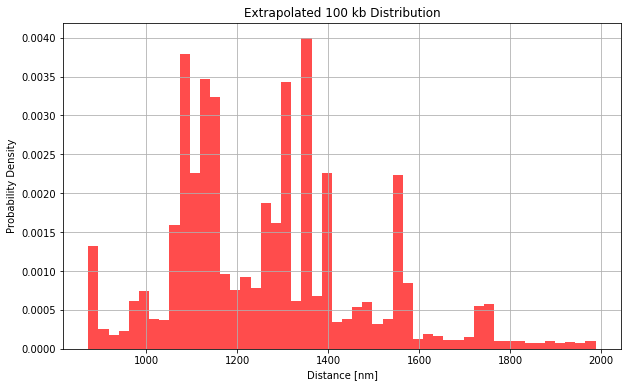

(1267.0129501816175, 210.0795843679963)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the actual 3 Mb distances
actual_distances_3Mb = average_3D_distances_all.iloc[0].values

# Calculate the ECDF for 3 Mb data
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_3Mb, y_3Mb = ecdf(actual_distances_3Mb)

# Generate random samples for the extrapolated 100 kb distribution
np.random.seed(0)
random_uniform_samples = np.random.uniform(0, 1, 10000)  # Generate random values between 0 and 1

# Map uniform samples to the 3 Mb distribution using the ECDF
extrapolated_samples = np.interp(random_uniform_samples, y_3Mb, x_3Mb)

# Plot the ECDF of the original 3 Mb data
plt.figure(figsize=(10, 6))
plt.plot(x_3Mb, y_3Mb, label='ECDF of 3 Mb Data', color='blue')
plt.xlabel('Distance [nm]')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.legend()
plt.grid(True)
plt.show()

# Plot a histogram of the extrapolated 100 kb samples
plt.figure(figsize=(10, 6))
plt.hist(extrapolated_samples, bins=50, color='red', alpha=0.7, density=True)
plt.xlabel('Distance [nm]')
plt.ylabel('Probability Density')
plt.title('Extrapolated 100 kb Distribution')
plt.grid(True)
plt.show()

# Calculate mean and standard deviation for the extrapolated distribution
mean_100kb_calculated = np.mean(extrapolated_samples)
std_dev_100kb_calculated = np.std(extrapolated_samples)

mean_100kb_calculated, std_dev_100kb_calculated


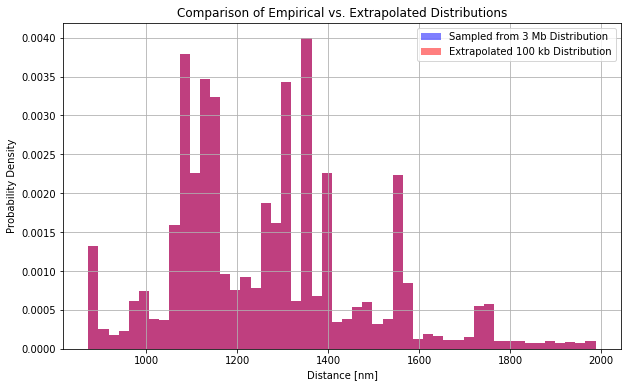

((1267.0129501816175, 210.0795843679963),
 (1267.0129501816175, 210.0795843679963))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the actual 3 Mb distances
actual_distances_3Mb = average_3D_distances_all.iloc[0].values

# Calculate the ECDF for 3 Mb data
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_3Mb, y_3Mb = ecdf(actual_distances_3Mb)

# Generate random samples for the extrapolated 100 kb distribution
np.random.seed(0)
random_uniform_samples = np.random.uniform(0, 1, 10000)  # Generate random values between 0 and 1

# Map uniform samples to the 3 Mb distribution using the ECDF for comparison
sampled_3Mb = np.interp(random_uniform_samples, y_3Mb, x_3Mb)

# Plot histograms of both distributions for comparison
plt.figure(figsize=(10, 6))
plt.hist(sampled_3Mb, bins=50, color='blue', alpha=0.5, label='Sampled from 3 Mb Distribution', density=True)
plt.hist(extrapolated_samples, bins=50, color='red', alpha=0.5, label='Extrapolated 100 kb Distribution', density=True)
plt.xlabel('Distance [nm]')
plt.ylabel('Probability Density')
plt.title('Comparison of Empirical vs. Extrapolated Distributions')
plt.legend()
plt.grid(True)
plt.show()

# Calculate summary statistics for both distributions
mean_3Mb_sampled = np.mean(sampled_3Mb)
std_dev_3Mb_sampled = np.std(sampled_3Mb)

mean_100kb_extrapolated = np.mean(extrapolated_samples)
std_dev_100kb_extrapolated = np.std(extrapolated_samples)

(mean_3Mb_sampled, std_dev_3Mb_sampled), (mean_100kb_extrapolated, std_dev_100kb_extrapolated)


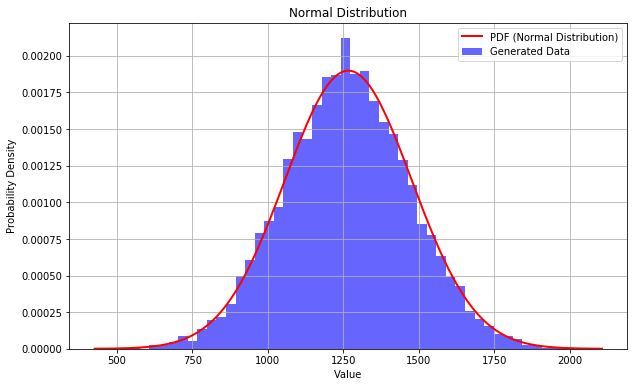

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Mean and standard deviation
mean = 1267.0129501816175
std_dev = 210.0795843679963

# Generate random data points from the normal distribution
np.random.seed(0)  # For reproducibility
data = np.random.normal(mean, std_dev, 10000)  # You can adjust the number of data points (e.g., 10000)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, color='blue', label='Generated Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.grid(True)

# Overlay the probability density function (PDF) of the normal distribution
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r-', lw=2, label='PDF (Normal Distribution)')
plt.legend()

plt.show()


In [ ]:
import numpy as np

# Mean and standard deviation
mean = 1267.0129501816175
std_dev = 210.0795843679963

# Generate random data points from the normal distribution
np.random.seed(0)  # For reproducibility
data = np.random.normal(mean, std_dev, 10000)  # You can adjust the number of data points (e.g., 10000)

# Save the data as a NumPy binary file (.npy)
np.save('normal_distribution_data.npy', data)

In [ ]:
(100000**0.24)*35.24

558.5163610232963

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Initialize the DataFrame to store the average 3D distances along with standard deviation
average_std_distances_all = pd.DataFrame()

# Iterate over both homologs
for homolog in [1, 2]:
    # Initialize the DataFrame to store the average 3D distances for each chromosome
    average_std_distances_chr = pd.DataFrame()

    # Iterate over all chromosomes
    for chromosome in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                       '17', '18', '19', '20', '21', '22', 'X']:

        # Filter the DataFrame for cell number 1, chromosome, and homolog
        selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                                      (anchor_points['chromosome'] == chromosome) &
                                      (anchor_points['homolog number'] == homolog)]

        # Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
        x_values = selected_data['x(nm)'].values
        y_values = selected_data['y(nm)'].values
        z_values = selected_data['z(nm)'].values

        # Create a list to store the pairwise distances for each loci distance
        loci_distances = []
        pairwise_distances_list = []

        # Generate all possible pairs of loci within the subgroup and their respective distances
        for i, j in combinations(range(len(x_values)), 2):
            x1, y1, z1 = x_values[i], y_values[i], z_values[i]
            x2, y2, z2 = x_values[j], y_values[j], z_values[j]

            # Calculate the 3D distance between the two loci
            distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

            # Determine the loci distance
            loci_distance = j - i - 1

            # Append the loci distance and pairwise distance to their respective lists
            loci_distances.append(loci_distance)
            pairwise_distances_list.append(distance)

        # Create a new DataFrame to store the pairwise distances and loci distances
        pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                              '3D distance (nm)': pairwise_distances_list})

        # Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
        grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

        # Convert the grouped result to a DataFrame
        grouped_distances_df = grouped_distances.apply(pd.Series)

        # Rename the columns to include 'Loci Distance'
        grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

        # Calculate the average 3D distance for each loci distance
        transformed_distances_numeric = grouped_distances_df.apply(pd.to_numeric, errors='coerce')
        spatial_distance_averages = transformed_distances_numeric.mean(axis=1, skipna=True)

        # Calculate the standard deviation for each loci distance
        spatial_distance_std = transformed_distances_numeric.std(axis=1, skipna=True)

        # Append the average 3D distances and standard deviations to the DataFrame
        chr_column_name = f'hom{homolog}_chr{chromosome}'
        average_std_distances_chr = average_std_distances_chr.assign(**{
            f'{chr_column_name}_avg': spatial_distance_averages,
            f'{chr_column_name}_std': spatial_distance_std
        })

    # Calculate the average and standard deviation for each row across chromosomes for the current homolog
    hom_column_name = f'hom{homolog}_avg_std'
    hom_avg_std_across_chr = average_std_distances_chr.filter(like=f'hom{homolog}').mean(axis=1), average_std_distances_chr.filter(like=f'hom{homolog}').std(axis=1)

    # Append the results for the current homolog to the main DataFrame
    average_std_distances_all = average_std_distances_all.assign(**{
        hom_column_name + '_avg': hom_avg_std_across_chr[0],
        hom_column_name + '_std': hom_avg_std_across_chr[1]
    })

# Calculate the average and standard deviation for each row across all chromosomes and homologs
all_chr_all_hom_avg_std = average_std_distances_all.filter(like='_avg').mean(axis=1), average_std_distances_all.filter(like='_std').mean(axis=1)

# Append the results for all chromosomes and homologs to the main DataFrame
average_std_distances_all = average_std_distances_all.assign(**{
    'all_chr_all_hom_avg': all_chr_all_hom_avg_std[0],
    'all_chr_all_hom_std': all_chr_all_hom_avg_std[1]
})

# Now you can work with the resulting average_std_distances_all DataFrame
# which contains the average and standard deviation for each combination of cell, chromosome, and homolog.


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Initialize the DataFrame to store the average 3D distances
average_3D_distances_all = pd.DataFrame()

# Iterate over all chromosomes
for chromosome in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', 'X']:
    # Iterate over both homologs
    for homolog in [1, 2]:
        # Filter the DataFrame for cell number 1, chromosome, and homolog
        selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                                      (anchor_points['chromosome'] == chromosome) &
                                      (anchor_points['homolog number'] == homolog)]

        # Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
        x_values = selected_data['x(nm)'].values
        y_values = selected_data['y(nm)'].values
        z_values = selected_data['z(nm)'].values

        # Create a list to store the pairwise distances for each loci distance
        loci_distances = []
        pairwise_distances_list = []

        # Generate all possible pairs of loci within the subgroup and their respective distances
        for i, j in combinations(range(len(x_values)), 2):
            x1, y1, z1 = x_values[i], y_values[i], z_values[i]
            x2, y2, z2 = x_values[j], y_values[j], z_values[j]

            # Calculate the 3D distance between the two loci
            distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

            # Determine the loci distance
            loci_distance = j - i - 1

            # Append the loci distance and pairwise distance to their respective lists
            loci_distances.append(loci_distance)
            pairwise_distances_list.append(distance)

        # Create a new DataFrame to store the pairwise distances and loci distances
        pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                              '3D distance (nm)': pairwise_distances_list})

        # Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
        grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

        # Convert the grouped result to a DataFrame
        grouped_distances_df = grouped_distances.apply(pd.Series)

        # Rename the columns to include 'Loci Distance'
        grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

        # Calculate the average 3D distance for each loci distance
        transformed_distances_numeric = grouped_distances_df.apply(pd.to_numeric, errors='coerce')
        spatial_distance_averages = transformed_distances_numeric.mean(axis=1, skipna=True)

        # Append the average 3D distances to the DataFrame
        column_name = f'cell1_chr{chromosome}_hom{homolog}'
        average_3D_distances_all[column_name] = spatial_distance_averages

# Now you can work with the resulting average_3D_distances_all DataFrame
# which contains the average 3D distances for each combination of cell, chromosome, and homolog.

# Lists to store calculated means and standard deviations
homolog1_avg = []
homolog1_std = []
homolog2_avg = []
homolog2_std = []
chromosome_avg = []
chromosome_std = []
all_data_avg = []
all_data_std = []

# Iterate over each row (distance)
for index, row in average_3D_distances_all.iterrows():
    # Calculate the mean and standard deviation for Homolog 1 columns
    homolog1_data = row.filter(like='_hom1')
    homolog1_avg.append(homolog1_data.mean())
    homolog1_std.append(homolog1_data.std())

    # Calculate the mean and standard deviation for Homolog 2 columns
    homolog2_data = row.filter(like='_hom2')
    homolog2_avg.append(homolog2_data.mean())
    homolog2_std.append(homolog2_data.std())

    # Calculate the mean and standard deviation for each chromosome (both homologs combined)
    chromosome_data = row.drop(['cell1_chrX_hom1', 'cell1_chrX_hom2'])
    chromosome_avg.append(chromosome_data.mean())
    chromosome_std.append(chromosome_data.std())

    # Calculate the mean and standard deviation for all columns (all data)
    all_data_avg.append(row.mean())
    all_data_std.append(row.std())

# Create DataFrames to store the calculated means and standard deviations
homolog1_results = pd.DataFrame({'Average': homolog1_avg, 'Std Dev': homolog1_std})
homolog2_results = pd.DataFrame({'Average': homolog2_avg, 'Std Dev': homolog2_std})
chromosome_results = pd.DataFrame({'Average': chromosome_avg, 'Std Dev': chromosome_std})
all_data_results = pd.DataFrame({'Average': all_data_avg, 'Std Dev': all_data_std})

# Now you can work with the resulting DataFrames for each category
# which contain the calculated averages and standard deviations.


In [ ]:
homolog1_results

,Average,Std Dev
0,1342.652683,239.813781
1,1634.506389,268.812490
2,1776.716561,230.410057
3,1882.650094,300.459505
4,1978.460601,349.012418
5,1999.219153,357.977541
6,2014.378580,331.399406
7,2070.863161,310.391550
8,2128.458715,296.875199
9,2159.685386,258.775990


In [ ]:
homolog2_results

,Average,Std Dev
0,1221.084101,188.843478
1,1514.273238,247.670507
2,1669.575550,305.790565
3,1801.964598,339.071616
4,1835.150523,332.211637
5,1880.565270,354.684924
6,1884.639648,339.147308
7,1930.913235,324.288704
8,1955.972003,269.526299
9,1997.258439,342.921006


In [ ]:
chromosome_results

,Average,Std Dev
0,1282.251586,227.197454
1,1573.842767,261.176542
2,1718.681608,270.100714
3,1841.986368,313.432572
4,1914.026957,341.110137
5,1951.812437,353.979869
6,1959.099171,335.076720
7,2008.706113,320.203717
8,2047.279228,281.041032
9,2083.938734,299.856718


In [ ]:
average_std_distances_all

,hom1_avg_std_avg,hom1_avg_std_std,hom2_avg_std_avg,hom2_avg_std_std,all_chr_all_hom_avg,all_chr_all_hom_std
Loci Distance,,,,,,
0,1101.525595,382.938897,949.958705,330.748634,691.292957,691.292957
1,1267.346368,470.835019,1143.376613,440.276120,830.458530,830.458530
2,1377.861472,494.364500,1233.365541,508.034103,903.406404,903.406404
3,1426.297670,548.857650,1323.607875,559.991885,964.688770,964.688770
4,1496.370945,581.651175,1346.293837,567.955344,998.067825,998.067825
5,1517.852733,572.685330,1377.068524,588.334644,1013.985308,1013.985308
6,1499.213262,590.008224,1414.730837,552.639318,1014.147910,1014.147910
7,1580.483761,564.057000,1441.859541,571.672991,1039.518324,1039.518324
8,1604.174911,593.943614,1426.738150,605.701694,1057.639592,1057.639592


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Initialize the DataFrame to store the average 3D distances
average_3D_distances_all = pd.DataFrame()

# Iterate over all chromosomes
for chromosome in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', 'X']:
    # Iterate over both homologs
    for homolog in [1, 2]:
        # Filter the DataFrame for cell number 1, chromosome, and homolog
        selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                                      (anchor_points['chromosome'] == chromosome) &
                                      (anchor_points['homolog number'] == homolog)]

        # Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
        x_values = selected_data['x(nm)'].values
        y_values = selected_data['y(nm)'].values
        z_values = selected_data['z(nm)'].values

        # Create a list to store the pairwise distances for each loci distance
        loci_distances = []
        pairwise_distances_list = []

        # Generate all possible pairs of loci within the subgroup and their respective distances
        for i, j in combinations(range(len(x_values)), 2):
            x1, y1, z1 = x_values[i], y_values[i], z_values[i]
            x2, y2, z2 = x_values[j], y_values[j], z_values[j]

            # Calculate the 3D distance between the two loci
            distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

            # Determine the loci distance
            loci_distance = j - i - 1

            # Append the loci distance and pairwise distance to their respective lists
            loci_distances.append(loci_distance)
            pairwise_distances_list.append(distance)

        # Create a new DataFrame to store the pairwise distances and loci distances
        pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                              '3D distance (nm)': pairwise_distances_list})

        # Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
        grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

        # Convert the grouped result to a DataFrame
        grouped_distances_df = grouped_distances.apply(pd.Series)

        # Rename the columns to include 'Loci Distance'
        grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

        # Calculate the average 3D distance for each loci distance
        transformed_distances_numeric = grouped_distances_df.apply(pd.to_numeric, errors='coerce')
        spatial_distance_averages = transformed_distances_numeric.mean(axis=1, skipna=True)

        # Append the average 3D distances to the DataFrame
        column_name = f'cell1_chr{chromosome}_hom{homolog}'
        average_3D_distances_all[column_name] = spatial_distance_averages

# Now you can work with the resulting average_3D_distances_all DataFrame
# which contains the average 3D distances for each combination of cell, chromosome, and homolog.

# Lists to store calculated means and standard deviations for homolog 1 and homolog 2
homolog1_avg = []
homolog1_std = []
homolog2_avg = []
homolog2_std = []

# Iterate over each row (distance)
for index, row in average_3D_distances_all.iterrows():
    # Calculate the mean and standard deviation for Homolog 1 columns
    homolog1_data = row.filter(like='_hom1')
    homolog1_avg.append(homolog1_data.mean())
    homolog1_std.append(homolog1_data.std())

    # Calculate the mean and standard deviation for Homolog 2 columns
    homolog2_data = row.filter(like='_hom2')
    homolog2_avg.append(homolog2_data.mean())
    homolog2_std.append(homolog2_data.std())

# Calculate the average and standard deviation for homolog 1 and homolog 2 across all chromosomes
average_homolog1_all_chromosomes = np.mean(homolog1_avg)
std_dev_homolog1_all_chromosomes = np.mean(homolog1_std)
average_homolog2_all_chromosomes = np.mean(homolog2_avg)
std_dev_homolog2_all_chromosomes = np.mean(homolog2_std)

# Lists to store calculated means and standard deviations for each chromosome
chromosome_avg_both_homologs = []
chromosome_std_both_homologs = []

# Iterate over all chromosomes
for chromosome in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', 'X']:
    # Filter the DataFrame to consider only the current chromosome
    chromosome_data = average_3D_distances_all.filter(like=f'cell1_chr{chromosome}_hom')

    # Calculate the mean for both homologs columns of the current chromosome
    chromosome_avg_both_homologs.append(chromosome_data.mean())
    chromosome_std_both_homologs.append(chromosome_data.std())

# Create DataFrames to store the calculated means and standard deviations for each chromosome
chromosome_results_both_homologs = pd.DataFrame({'Chromosome Average (Both Homologs)': chromosome_avg_both_homologs,
                                                 'Chromosome Std Dev (Both Homologs)': chromosome_std_both_homologs})

# Create DataFrames to store the calculated averages and standard deviations
homolog1_results = pd.DataFrame({
    'Average': homolog1_avg,
    'Std Dev': homolog1_std
})

homolog2_results = pd.DataFrame({
    'Average': homolog2_avg,
    'Std Dev': homolog2_std
})

chromosome_results_both_homologs = pd.DataFrame(chromosome_avg_both_homologs)

# Calculate the average and standard deviation for all data (all columns)
all_data_avg = average_both_homologs_all_chromosomes
all_data_std = std_dev_both_homologs_all_chromosomes

# Now you can work with the resulting DataFrames for each category
# which contain the calculated averages and standard deviations.


NameError: name 'average_both_homologs_all_chromosomes' is not defined

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

unique_cell_numbers = anchor_points['cell number'].unique()

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# List to store the resulting DataFrames
resulting_dataframes = []

# Iterate over all cell numbers
for cell_number in unique_cell_numbers:  # You need to define unique_cell_numbers

    # Filter the DataFrame for the current cell number
    selected_data_cell = anchor_points[anchor_points['cell number'] == cell_number]

    # Initialize the DataFrame to store the average 3D distances for the current cell number
    average_3D_distances_cell = pd.DataFrame()

    # Iterate over all chromosomes
    for chromosome in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                       '17', '18', '19', '20', '21', '22', 'X']:
        # Iterate over both homologs
        for homolog in [1, 2]:
            # Filter the DataFrame for the current chromosome and homolog
            selected_data = selected_data_cell[
                (selected_data_cell['chromosome'] == chromosome) &
                (selected_data_cell['homolog number'] == homolog)
            ]

            # Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
            x_values = selected_data['x(nm)'].values
            y_values = selected_data['y(nm)'].values
            z_values = selected_data['z(nm)'].values

            # Create a list to store the pairwise distances for each loci distance
            loci_distances = []
            pairwise_distances_list = []

            # Generate all possible pairs of loci within the subgroup and their respective distances
            for i, j in combinations(range(len(x_values)), 2):
                x1, y1, z1 = x_values[i], y_values[i], z_values[i]
                x2, y2, z2 = x_values[j], y_values[j], z_values[j]

                # Calculate the 3D distance between the two loci
                distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

                # Determine the loci distance
                loci_distance = j - i - 1

                # Append the loci distance and pairwise distance to their respective lists
                loci_distances.append(loci_distance)
                pairwise_distances_list.append(distance)

            # Create a new DataFrame to store the pairwise distances and loci distances
            pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                              '3D distance (nm)': pairwise_distances_list})

            # Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
            grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

            # Convert the grouped result to a DataFrame
            grouped_distances_df = grouped_distances.apply(pd.Series)

            # Rename the columns to include 'Loci Distance'
            grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

            # Calculate the average 3D distance for each loci distance
            transformed_distances_numeric = grouped_distances_df.apply(pd.to_numeric, errors='coerce')
            spatial_distance_averages = transformed_distances_numeric.mean(axis=1, skipna=True)

            # Append the average 3D distances to the DataFrame
            column_name = f'cell{cell_number}_chr{chromosome}_hom{homolog}'
            average_3D_distances_cell = average_3D_distances_cell.assign(**{column_name: spatial_distance_averages})

    # Append the resulting DataFrame for the current cell number to the list
    resulting_dataframes.append(average_3D_distances_cell)

# Now resulting_dataframes list contains DataFrames for each combination of cell number, chromosome, and homolog
# You can access these DataFrames using resulting_dataframes[index]


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1) or np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
        return 'NaN'
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Initialize the DataFrame to store the average 3D distances
average_3D_distances_all = pd.DataFrame()

# Lists to store averages and standard deviations
homolog1_averages = []
homolog1_std_deviations = []
homolog2_averages = []
homolog2_std_deviations = []

# Iterate over all cell numbers
for cell_number in range(1, 1788):
    homolog1_distances = []
    homolog2_distances = []

    # Iterate over all chromosomes
    for chromosome in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                   '17', '18', '19', '20', '21', '22', 'X']:
        # Filter the DataFrame for the current cell number, chromosome, and homolog
        selected_data = anchor_points[(anchor_points['cell number'] == cell_number) &
                                      (anchor_points['chromosome'] == chromosome)]

        # Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
        x_values = selected_data['x(nm)'].values
        y_values = selected_data['y(nm)'].values
        z_values = selected_data['z(nm)'].values

        homolog1_distances = []
        homolog2_distances = []

        # Generate all possible pairs of loci within the subgroup and their respective distances
        for i, j in combinations(range(len(x_values)), 2):
            x1, y1, z1 = x_values[i], y_values[i], z_values[i]
            x2, y2, z2 = x_values[j], y_values[j], z_values[j]

            # Calculate the 3D distance between the two loci
            distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

            # Check if the homolog number matches and append distances accordingly
            if selected_data['homolog number'].iloc[i] == 1 and selected_data['homolog number'].iloc[j] == 1:
                homolog1_distances.append(distance)
            elif selected_data['homolog number'].iloc[i] == 2 and selected_data['homolog number'].iloc[j] == 2:
                homolog2_distances.append(distance)

        # Calculate the average and standard deviation for homolog 1 distances
        homolog1_distances_numeric = [distance for distance in homolog1_distances if isinstance(distance, (int, float))]
        homolog1_average = np.mean(homolog1_distances_numeric)
        homolog1_std_dev = np.std(homolog1_distances_numeric)

        # Calculate the average and standard deviation for homolog 2 distances
        homolog2_distances_numeric = [distance for distance in homolog2_distances if isinstance(distance, (int, float))]
        homolog2_average = np.mean(homolog2_distances_numeric)
        homolog2_std_dev = np.std(homolog2_distances_numeric)

        # Append averages and standard deviations to lists
        homolog1_averages.append(homolog1_average)
        homolog1_std_deviations.append(homolog1_std_dev)
        homolog2_averages.append(homolog2_average)
        homolog2_std_deviations.append(homolog2_std_dev)

# Create a DataFrame to store the results
homologs_df = pd.DataFrame({
    'Homolog 1 Average': homolog1_averages,
    'Homolog 1 Std Dev': homolog1_std_deviations,
    'Homolog 2 Average': homolog2_averages,
    'Homolog 2 Std Dev': homolog2_std_deviations
})

# Print the resulting DataFrame
homologs_df.head(10)

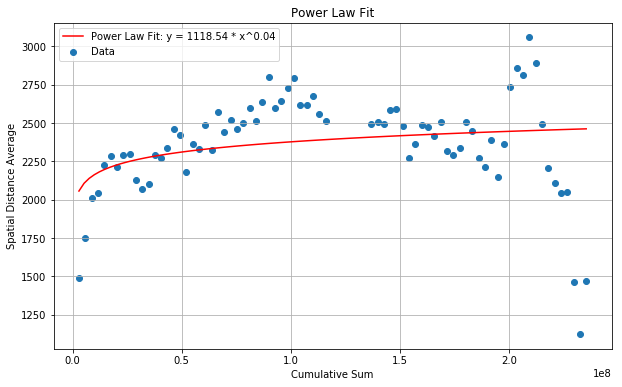

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Convert data to numpy arrays
x_data = np.array(filtered_distances["Cumulative Sum"])
y_data = np.array(spatial_distance_averages_1_1_1)

# Fit the power law equation to the data
params, covariance = curve_fit(power_law, x_data, y_data)

# Get the parameters (a and b) of the power law equation
a, b = params

# Generate x values for the power law curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = power_law(x_fit, a, b)

# Plot the data and the power law curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_fit, y_fit, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Cumulative Sum")
plt.ylabel("Spatial Distance Average")
plt.title("Power Law Fit")
plt.legend()
plt.grid(True)
plt.show()

/gpfs/runtime/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


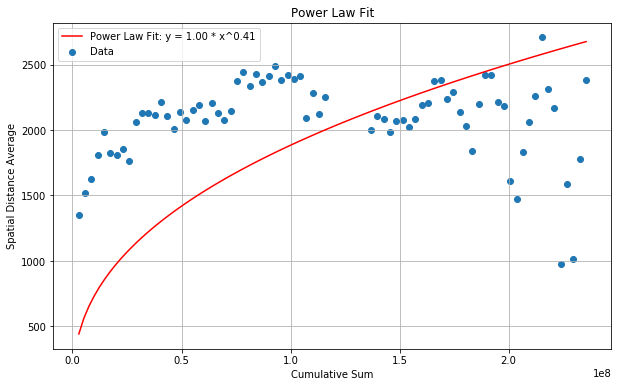

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return np.power(x, b)

# Convert data to numpy arrays
x_data = np.array(filtered_distances["Cumulative Sum"])
y_data = np.array(spatial_distance_averages_1_1_2)

# Fit the power law equation to the data
params, covariance = curve_fit(power_law, x_data, y_data)

# Get the parameters (a and b) of the power law equation
a, b = params

# Generate x values for the power law curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = power_law(x_fit, a, b)

# Plot the data and the power law curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_fit, y_fit, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Cumulative Sum")
plt.ylabel("Spatial Distance Average")
plt.title("Power Law Fit")
plt.legend()
plt.grid(True)
plt.show()

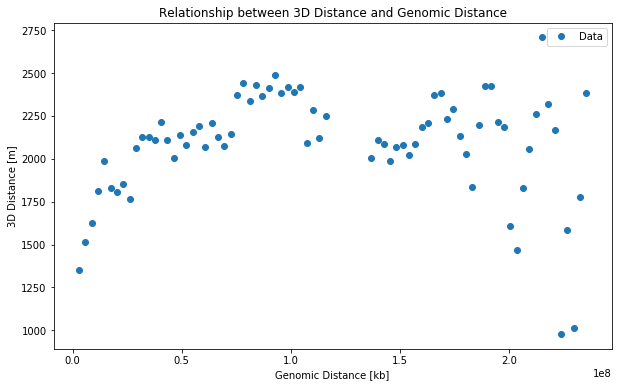

Exponent d: 2.4426866776056597


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law function <R> ~ s^(1/d)
def power_law(s, d):
    return s**(1/d)

# Convert 3D distance from nanometers to meters
y_data_meters = spatial_distance_averages_1_1_2

# Define the genomic distance (s) in kilo base pairs
x_data_kb = filtered_distances["Cumulative Sum"]

# Create a plot of 3D Distance vs. Genomic Distance
plt.figure(figsize=(10, 6))
plt.plot(x_data_kb, y_data_meters, 'o', label='Data')
plt.xlabel('Genomic Distance [kb]')
plt.ylabel('3D Distance [m]')
plt.title('Relationship between 3D Distance and Genomic Distance')
plt.legend()
plt.show()

# Perform curve fitting to find the exponent d
params, covariance = curve_fit(power_law, x_data_kb, y_data_meters)

# Get the exponent d from the fitted parameters
d = params[0]

print("Exponent d:", d)

Exponent d: 2.4426866776056597


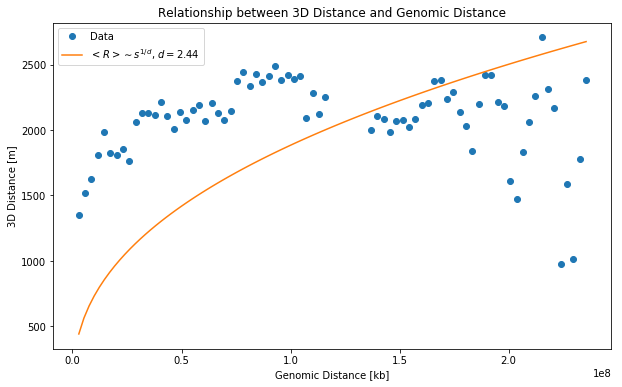

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law function <R> ~ s^(1/d)
def power_law(s, d):
    return s**(1/d)

# Convert 3D distance from nanometers to meters
y_data_meters = spatial_distance_averages_1_1_2

# Define the genomic distance (s) in kilo base pairs (kb)
x_data_kb = filtered_distances["Cumulative Sum"]/1000

# Create a plot of 3D Distance vs. Genomic Distance
plt.figure(figsize=(10, 6))
plt.plot(x_data_kb, y_data_meters, 'o', label='Data')
plt.xlabel('Genomic Distance [kb]')
plt.ylabel('3D Distance [m]')
plt.title('Relationship between 3D Distance and Genomic Distance')

# Perform curve fitting to find the exponent d
params, covariance = curve_fit(power_law, x_data_kb, y_data_meters)

# Get the exponent d from the fitted parameters
d = params[0]
print("Exponent d:", d)

# Generate x values for the fitted curve
x_fit = np.linspace(min(x_data_kb), max(x_data_kb), 100)
# Calculate y values using the power law function
y_fit = power_law(x_fit, d)

# Plot the fitted curve
plt.plot(x_fit, y_fit, label=r'$<R> \sim s^{1/d}$, $d=%.2f$' % d)

# Add legend
plt.legend()

# Show the plot
plt.show()

Linear fit parameter 'a': 0.012983545223367088


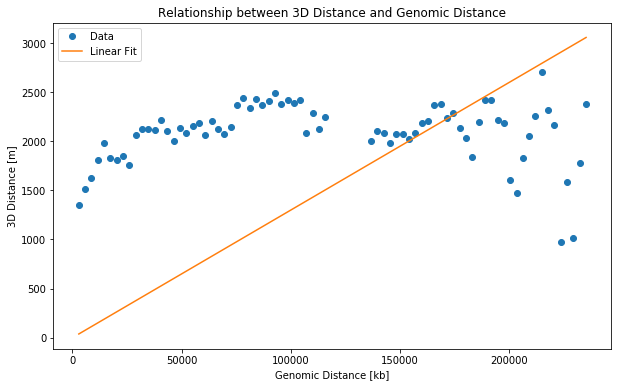

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Convert 3D distance from nanometers to meters
y_data_meters = spatial_distance_averages_1_1_2

# Define the genomic distance (s) in kilo base pairs (kb)
x_data_kb = filtered_distances["Cumulative Sum"] / 1000

# Calculate the exponent d
d = 1.5555988750717218

# Perform linear fitting using the calculated "d" value
def linear_fit(x, a):
    return a * x

# Perform linear fitting using scipy.curve_fit
linear_params, linear_covariance = curve_fit(linear_fit, x_data_kb, y_data_meters)

# Get the linear fit parameter "a"
a = linear_params[0]
print("Linear fit parameter 'a':", a)

# Generate y values for the linear fit
y_linear_fit = linear_fit(x_data_kb, a)

# Create a plot of 3D Distance vs. Genomic Distance
plt.figure(figsize=(10, 6))
plt.plot(x_data_kb, y_data_meters, 'o', label='Data')
plt.plot(x_data_kb, y_linear_fit, label='Linear Fit')
plt.xlabel('Genomic Distance [kb]')
plt.ylabel('3D Distance [m]')
plt.title('Relationship between 3D Distance and Genomic Distance')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Assuming you already have the DataFrame 'anchor_points'

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Filter the DataFrame for cell number 1, chromosome 1, and homolog 1
selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                              (anchor_points['chromosome'] == '1') &
                              (anchor_points['homolog number'] == 1)]

# Drop rows with NaN values in 'x(nm)', 'y(nm)', or 'z(nm)' columns
selected_data = selected_data.dropna(subset=['x(nm)', 'y(nm)', 'z(nm)'])

# Extract the 'x(nm)', 'y(nm)', and 'z(nm)' values for the selected data
x_values = selected_data['x(nm)'].values
y_values = selected_data['y(nm)'].values
z_values = selected_data['z(nm)'].values

# Create a list to store the pairwise distances for each loci distance
loci_distances = []
pairwise_distances_list = []

# Generate all possible pairs of loci within the subgroup and their respective distances
for i, j in combinations(range(len(x_values)), 2):
    x1, y1, z1 = x_values[i], y_values[i], z_values[i]
    x2, y2, z2 = x_values[j], y_values[j], z_values[j]

    # Calculate the 3D distance between the two loci
    distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)

    # Determine the loci distance
    loci_distance = j - i - 1

    # Append the loci distance and pairwise distance to their respective lists
    loci_distances.append(loci_distance)
    pairwise_distances_list.append(distance)

# Create a new DataFrame to store the pairwise distances and loci distances
pairwise_distances_df = pd.DataFrame({'Loci Distance': loci_distances,
                                      '3D distance (nm)': pairwise_distances_list})

# Group the DataFrame by 'Loci Distance' and aggregate the 3D distances into lists
grouped_distances = pairwise_distances_df.groupby('Loci Distance')['3D distance (nm)'].apply(list)

# Convert the grouped result to a DataFrame
grouped_distances_df = grouped_distances.apply(pd.Series)

# Rename the columns to include 'Loci Distance'
grouped_distances_df.columns = [f'Loci Distance {col}' for col in grouped_distances_df.columns]

# Save the DataFrame to a CSV file without row indices
grouped_distances_df.to_csv('transformed_distances.csv', index=False)

# Save the DataFrame without writing to a CSV file
transformed_distances_1_1_1 = grouped_distances_df.copy()
transformed_distances_1_1_1

,Loci Distance 0,Loci Distance 1,Loci Distance 2,Loci Distance 3,Loci Distance 4,Loci Distance 5,Loci Distance 6,Loci Distance 7,Loci Distance 8,Loci Distance 9,...,Loci Distance 52,Loci Distance 53,Loci Distance 54,Loci Distance 55,Loci Distance 56,Loci Distance 57,Loci Distance 58,Loci Distance 59,Loci Distance 60,Loci Distance 61
Loci Distance,,,,,,,,,,,,,,,,,,,,,
0,689.977536,3263.390415,3568.121214,2807.360860,2389.983682,1142.637300,3767.088265,2673.620953,1198.828178,754.181013,...,2353.820087,1495.843909,1865.909430,2084.718446,1390.718519,1197.931968,1121.469572,980.347897,983.457676,750.571116
1,3748.265466,1797.645126,4231.409931,1468.255087,1470.416948,4307.406412,2328.555131,2301.753679,587.133716,2016.099948,...,3453.872320,970.307683,2838.557556,1061.326057,1170.733531,668.343475,1579.035782,1428.591264,1054.569106,NaN
2,1995.568340,1336.087946,3343.491289,1937.658639,2852.918856,2370.735962,1943.623420,2707.789689,978.726724,2082.406541,...,1757.421976,2134.589890,2566.843003,2122.825947,1257.532902,1641.731099,1189.006728,1822.693062,NaN,NaN
3,821.331845,1852.272388,4047.124164,3620.344873,1916.140652,2554.169141,1857.371530,3527.170112,1113.578017,2468.526889,...,1754.494514,1336.970456,3050.772689,1672.189583,1495.040802,1937.520581,1867.777824,NaN,NaN,NaN
4,1731.157416,1558.154357,5070.299991,2329.994850,871.386252,2119.819096,2364.190136,3583.990095,1662.442781,2540.701675,...,1063.180606,1880.232698,3162.799393,2604.676563,1333.567396,2393.231497,NaN,NaN,NaN,NaN
5,1034.642934,2563.499366,2610.410121,2682.462488,1348.429086,1933.478472,2250.153106,2443.987930,1586.291272,2521.506296,...,1820.318104,1984.240157,4007.398408,2954.212078,1568.824719,NaN,NaN,NaN,NaN,NaN
6,2826.625550,910.931391,3715.674636,2298.363331,2511.762927,1748.693512,3355.476270,2948.677161,1423.576833,2699.377891,...,699.881419,2927.714638,4006.114452,3344.529862,NaN,NaN,NaN,NaN,NaN,NaN
7,1506.791625,912.973713,2990.611142,2027.800286,2525.684660,3180.225306,3127.204662,3561.344409,1842.358814,2427.085495,...,1121.324217,2965.664512,4397.559550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,946.865355,601.609508,1879.440608,1822.048298,3191.512964,2769.146619,2840.032042,3270.785074,1683.034462,2193.434749,...,1919.877340,3496.247846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Assuming you already have the DataFrame 'anchor_points'

# Function to calculate 3D distance between two points
def calculate_3d_distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Filter the DataFrame for cell number 1, chromosome 1, and homolog 1
selected_data = anchor_points[(anchor_points['cell number'] == 1) &
                              (anchor_points['chromosome'] == '1') &
                              (anchor_points['homolog number'] == 1)]

# List to store results
pair_results = []

# Iterate through the rows of the selected data
for i in range(len(selected_data)):
    x1, y1, z1 = selected_data.iloc[i]['x(nm)'], selected_data.iloc[i]['y(nm)'], selected_data.iloc[i]['z(nm)']

    # Check for NaN values
    if np.isnan(x1) or np.isnan(y1) or np.isnan(z1):
        pair_results.append({'pair': i, 'success': False, 'reason': 'NaN in first point coordinates'})
        continue

    for j in range(i + 1, len(selected_data)):
        x2, y2, z2 = selected_data.iloc[j]['x(nm)'], selected_data.iloc[j]['y(nm)'], selected_data.iloc[j]['z(nm)']

        # Check for NaN values
        if np.isnan(x2) or np.isnan(y2) or np.isnan(z2):
            pair_results.append({'pair': f"{i}-{j}", 'success': False, 'reason': 'NaN in second point coordinates'})
            continue

        try:
            # Calculate the 3D distance between the two loci
            distance = calculate_3d_distance(x1, y1, z1, x2, y2, z2)
            pair_results.append({'pair': f"{i}-{j}", 'success': True, 'distance': distance})
        except Exception as e:
            pair_results.append({'pair': f"{i}-{j}", 'success': False, 'reason': str(e)})

# Display the results
for result in pair_results:
    print(f"Pair {result['pair']}: {'Success' if result['success'] else 'Failure'} - {result.get('reason', '')}")


Pair 0-1: Success - 
Pair 0-2: Failure - NaN in second point coordinates
Pair 0-3: Success - 
Pair 0-4: Success - 
Pair 0-5: Success - 
Pair 0-6: Success - 
Pair 0-7: Success - 
Pair 0-8: Failure - NaN in second point coordinates
Pair 0-9: Success - 
Pair 0-10: Success - 
Pair 0-11: Success - 
Pair 0-12: Success - 
Pair 0-13: Success - 
Pair 0-14: Success - 
Pair 0-15: Success - 
Pair 0-16: Success - 
Pair 0-17: Success - 
Pair 0-18: Success - 
Pair 0-19: Success - 
Pair 0-20: Success - 
Pair 0-21: Failure - NaN in second point coordinates
Pair 0-22: Success - 
Pair 0-23: Success - 
Pair 0-24: Success - 
Pair 0-25: Success - 
Pair 0-26: Success - 
Pair 0-27: Success - 
Pair 0-28: Failure - NaN in second point coordinates
Pair 0-29: Success - 
Pair 0-30: Failure - NaN in second point coordinates
Pair 0-31: Failure - NaN in second point coordinates
Pair 0-32: Success - 
Pair 0-33: Failure - NaN in second point coordinates
Pair 0-34: Success - 
Pair 0-35: Success - 
Pair 0-36: Failure - N

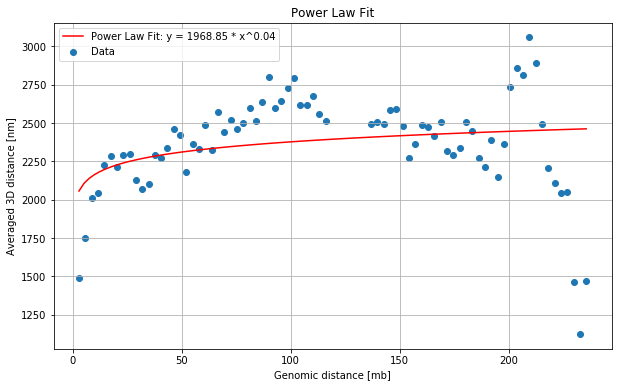

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Convert data to numpy arrays and convert base pairs to mega bases
x_data_bp = np.array(filtered_distances["Cumulative Sum"])
x_data_mb = x_data_bp / 1e6  # Convert to mega bases
y_data = np.array(spatial_distance_averages_1_1_1)

# Fit the power law equation to the data
params, covariance = curve_fit(power_law, x_data_mb, y_data)

# Get the parameters (a and b) of the power law equation
a, b = params

# Generate x values for the power law curve
x_fit_mb = np.linspace(min(x_data_mb), max(x_data_mb), 100)
y_fit = power_law(x_fit_mb, a, b)

# Plot the data and the power law curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data_mb, y_data, label="Data")
plt.plot(x_fit_mb, y_fit, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Genomic distance [mb]")  # Update x-axis label
plt.ylabel("Averaged 3D distance [nm]")
plt.title("Power Law Fit")
plt.legend()
plt.grid(True)
plt.show()


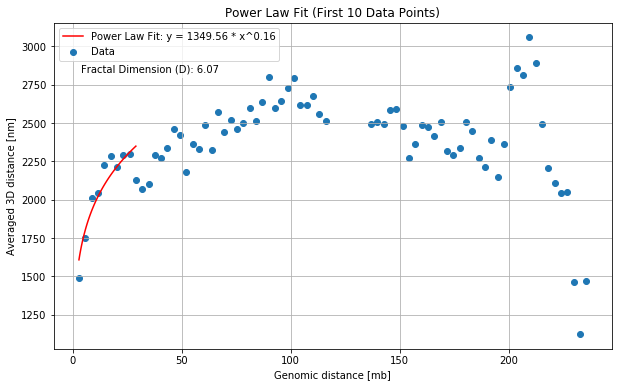

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Convert data to numpy arrays and convert base pairs to mega bases
x_data_bp = np.array(filtered_distances["Cumulative Sum"])
x_data_mb = x_data_bp / 1e6  # Convert to mega bases
y_data = np.array(spatial_distance_averages_1_1_1)

# Select the first 10 data points for fitting
x_fit_mb = x_data_mb[:10]
y_fit_data = y_data[:10]

# Fit the power law equation to the selected data
params, covariance = curve_fit(power_law, x_fit_mb, y_fit_data)

# Get the parameters (a and b) of the power law equation
a, b = params
fractal_dimension = 1.0 / b  # Calculate fractal dimension

# Generate x values for the power law curve
x_fit_curve = np.linspace(min(x_fit_mb), max(x_fit_mb), 100)
y_fit_curve = power_law(x_fit_curve, a, b)

# Plot the data and the power law curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data_mb, y_data, label="Data")
plt.plot(x_fit_curve, y_fit_curve, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Genomic distance [mb]")  # Update x-axis label
plt.ylabel("Averaged 3D distance [nm]")
plt.title("Power Law Fit (First 10 Data Points)")
plt.text(0.05, 0.85, f"Fractal Dimension (D): {fractal_dimension:.2f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()


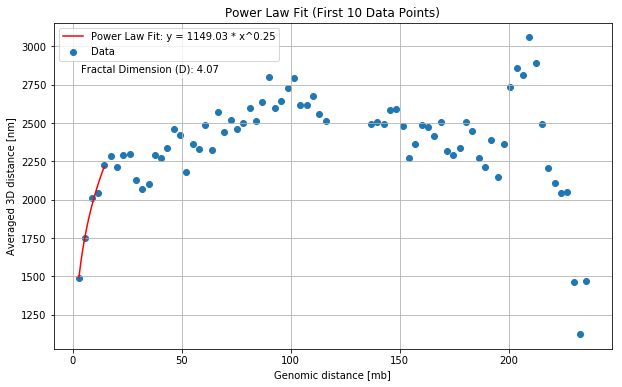

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Convert data to numpy arrays and convert base pairs to mega bases
x_data_bp = np.array(filtered_distances["Cumulative Sum"])
x_data_mb = x_data_bp / 1e6  # Convert to mega bases
y_data = np.array(spatial_distance_averages_1_1_1)

# Select the first 10 data points for fitting
x_fit_mb = x_data_mb[:5]
y_fit_data = y_data[:5]

# Fit the power law equation to the selected data
params, covariance = curve_fit(power_law, x_fit_mb, y_fit_data)

# Get the parameters (a and b) of the power law equation
a, b = params
fractal_dimension = 1.0 / b  # Calculate fractal dimension

# Generate x values for the power law curve
x_fit_curve = np.linspace(min(x_fit_mb), max(x_fit_mb), 100)
y_fit_curve = power_law(x_fit_curve, a, b)

# Plot the data and the power law curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data_mb, y_data, label="Data")
plt.plot(x_fit_curve, y_fit_curve, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Genomic distance [mb]")  # Update x-axis label
plt.ylabel("Averaged 3D distance [nm]")
plt.title("Power Law Fit (First 10 Data Points)")
plt.text(0.05, 0.85, f"Fractal Dimension (D): {fractal_dimension:.2f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()


/gpfs/runtime/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


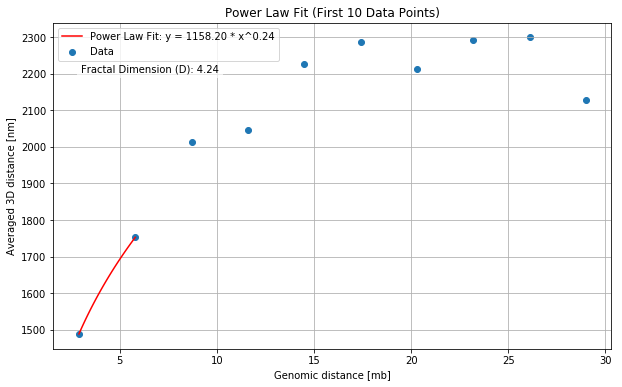

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Convert data to numpy arrays and convert base pairs to mega bases
x_data_bp = np.array(filtered_distances["Cumulative Sum"][:10])
x_data_mb = x_data_bp / 1e6  # Convert to mega bases
y_data = np.array(spatial_distance_averages_1_1_1[:10])

# Select the first 10 data points for fitting
x_fit_mb = x_data_mb[:2]
y_fit_data = y_data[:2]

# Fit the power law equation to the selected data
params, covariance = curve_fit(power_law, x_fit_mb, y_fit_data)

# Get the parameters (a and b) of the power law equation
a, b = params
fractal_dimension = 1.0 / b  # Calculate fractal dimension

# Generate x values for the power law curve
x_fit_curve = np.linspace(min(x_fit_mb), max(x_fit_mb), 100)
y_fit_curve = power_law(x_fit_curve, a, b)

# Plot the data and the power law curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data_mb, y_data, label="Data")
plt.plot(x_fit_curve, y_fit_curve, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Genomic distance [mb]")  # Update x-axis label
plt.ylabel("Averaged 3D distance [nm]")
plt.title("Power Law Fit (First 10 Data Points)")
plt.text(0.05, 0.85, f"Fractal Dimension (D): {fractal_dimension:.2f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()


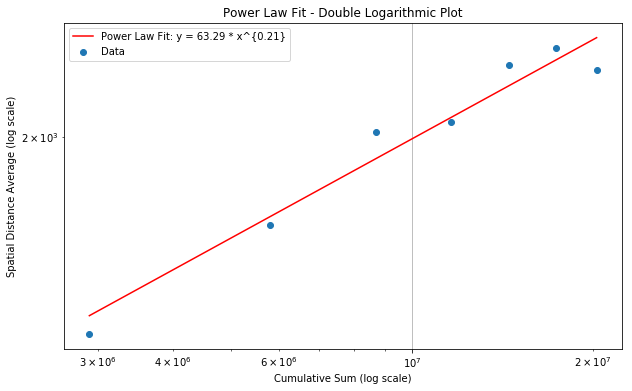

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Convert data to numpy arrays
x_data = np.array(filtered_distances["Cumulative Sum"][:7])
y_data = np.array(spatial_distance_averages_1_1_1[:7])

# Fit the power law equation to the data
params, covariance = curve_fit(power_law, x_data, y_data)

# Get the parameters (a and b) of the power law equation
a, b = params

# Generate x values for the power law curve
x_fit = np.logspace(np.log10(min(x_data)), np.log10(max(x_data)), 100)
y_fit = power_law(x_fit, a, b)

# Plot the data and the power law curve in double logarithmic scale
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_fit, y_fit, color="red", label="Power Law Fit: y = {:.2f} * x^{{{:.2f}}}".format(a, b))
plt.xlabel("Cumulative Sum (log scale)")
plt.ylabel("Spatial Distance Average (log scale)")
plt.title("Power Law Fit - Double Logarithmic Plot")
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.grid(True)
plt.show()


/gpfs/runtime/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


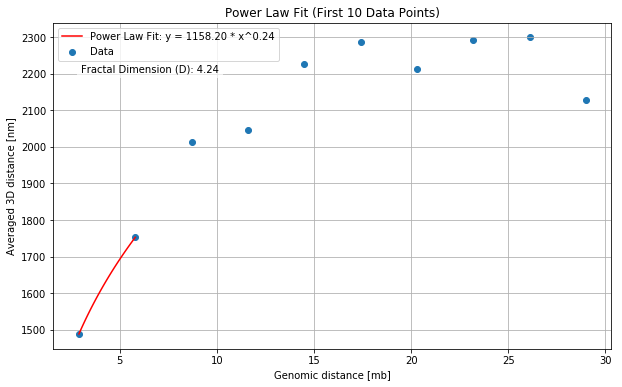

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Convert data to numpy arrays and convert base pairs to mega bases
x_data_bp = np.array(filtered_distances["Cumulative Sum"][:10])
x_data_mb = x_data_bp / 1e6  # Convert to mega bases
y_data = np.array(spatial_distance_averages_1_1_1[:10])

# Select the first 10 data points for fitting
x_fit_mb = x_data_mb[:2]
y_fit_data = y_data[:2]

# Fit the power law equation to the selected data
params, covariance = curve_fit(power_law, x_fit_mb, y_fit_data)

# Get the parameters (a and b) of the power law equation
a, b = params
fractal_dimension = 1.0 / b  # Calculate fractal dimension

# Generate x values for the power law curve
x_fit_curve = np.linspace(min(x_fit_mb), max(x_fit_mb), 100)
y_fit_curve = power_law(x_fit_curve, a, b)

# Plot the data and the power law curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data_mb, y_data, label="Data")
plt.plot(x_fit_curve, y_fit_curve, color="red", label=f"Power Law Fit: y = {a:.2f} * x^{b:.2f}")
plt.xlabel("Genomic distance [mb]")  # Update x-axis label
plt.ylabel("Averaged 3D distance [nm]")
plt.title("Power Law Fit (First 10 Data Points)")
plt.text(0.05, 0.85, f"Fractal Dimension (D): {fractal_dimension:.2f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
plt.legend()
plt.grid(True)
plt.show()


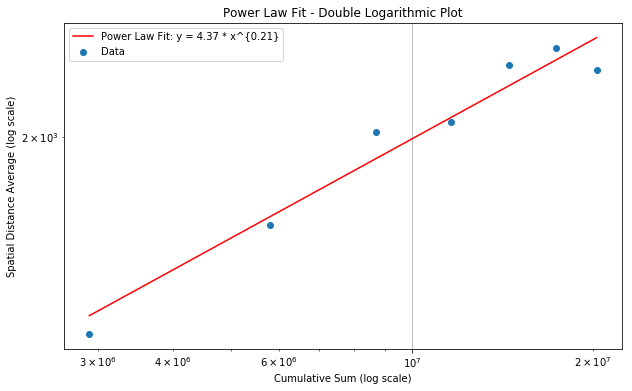

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Persistence length in nm
persistence_length = 30

# Convert data to numpy arrays
x_data = np.array(filtered_distances["Cumulative Sum"][:7])
y_data = np.array(spatial_distance_averages_1_1_1[:7])

# Normalize x and y values by persistence length
x_data_normalized = x_data / persistence_length
y_data_normalized = y_data / persistence_length

# Fit the power law equation to the normalized data
params, covariance = curve_fit(power_law, x_data_normalized, y_data_normalized)

# Get the parameters (a and b) of the power law equation
a, b = params

# Generate normalized x values for the power law curve
x_fit_normalized = np.logspace(np.log10(min(x_data_normalized)), np.log10(max(x_data_normalized)), 100)
y_fit_normalized = power_law(x_fit_normalized, a, b)

# Denormalize the fitted y values back to original scale
y_fit = y_fit_normalized * persistence_length

# Plot the data and the power law curve in double logarithmic scale
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_fit_normalized * persistence_length, y_fit, color="red", label="Power Law Fit: y = {:.2f} * x^{{{:.2f}}}".format(a, b))
plt.xlabel("Cumulative Sum (log scale)")
plt.ylabel("Spatial Distance Average (log scale)")
plt.title("Power Law Fit - Double Logarithmic Plot")
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.grid(True)
plt.show()


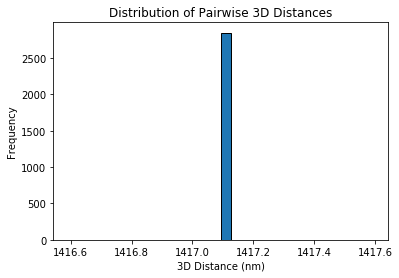

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

# Rest of your code...

# Create a list to store all calculated pairwise distances
all_pairwise_distances = []

# Generate all possible pairs of loci within the subgroup and their respective distances
for i, j in combinations(range(len(x_values)), 2):
    # Rest of your existing code...

    # Append the pairwise distance to the list
    all_pairwise_distances.append(distance)

# Plot a histogram of the pairwise distances
plt.hist(all_pairwise_distances, bins=30, edgecolor='black')
plt.xlabel('3D Distance (nm)')
plt.ylabel('Frequency')
plt.title('Distribution of Pairwise 3D Distances')
plt.show()


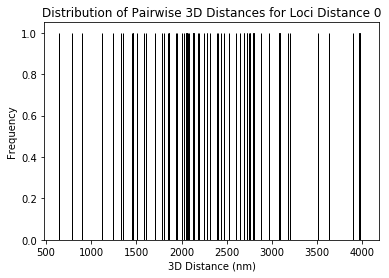

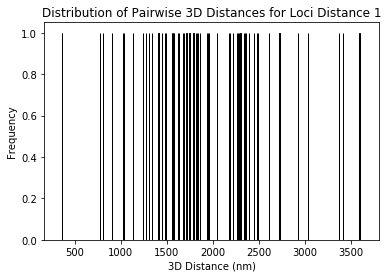

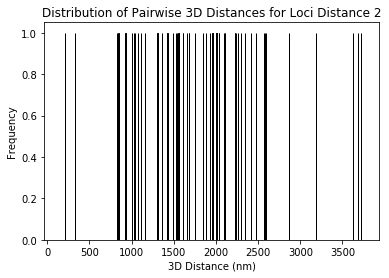

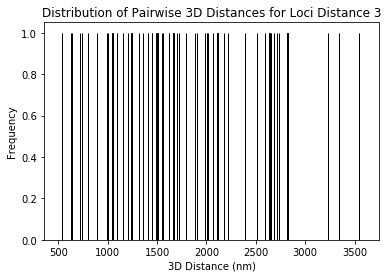

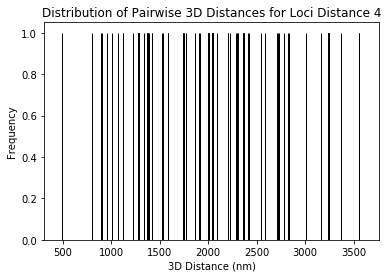

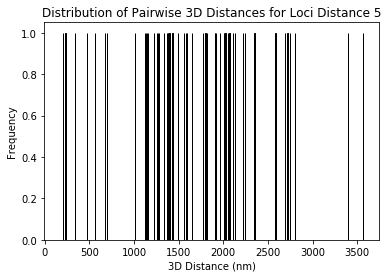

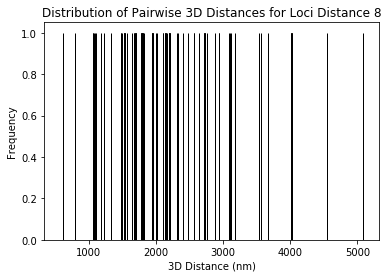

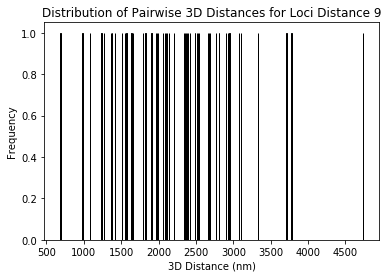

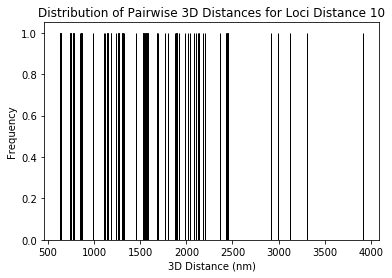

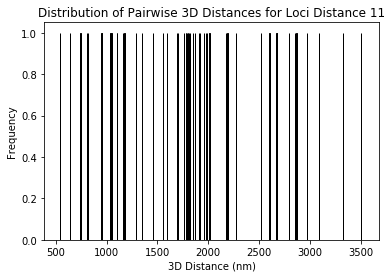

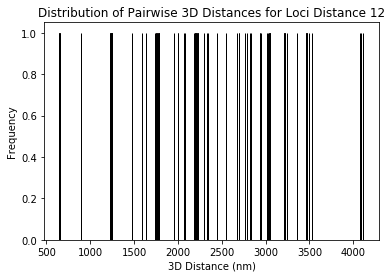

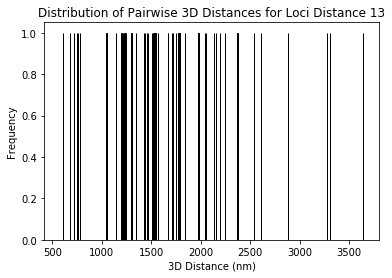

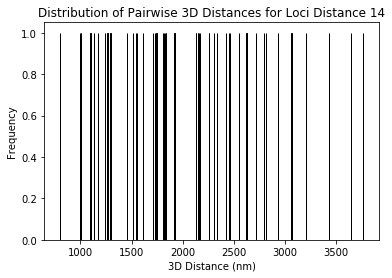

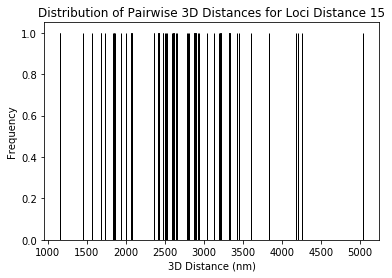

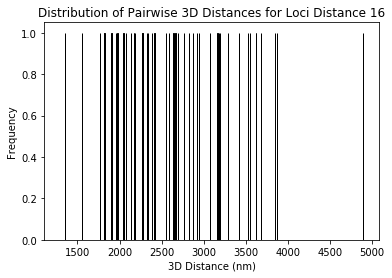

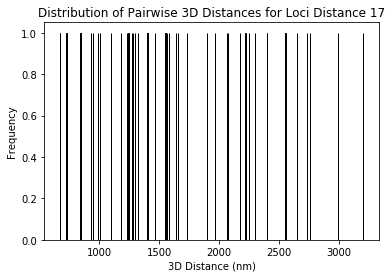

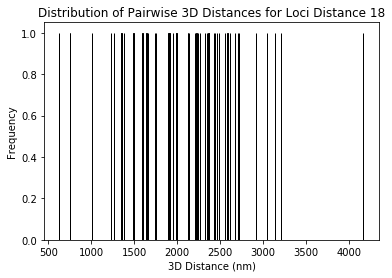

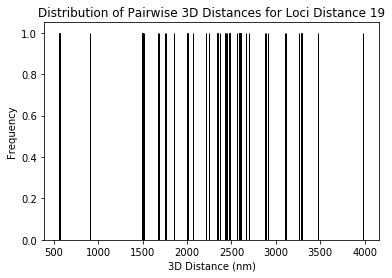

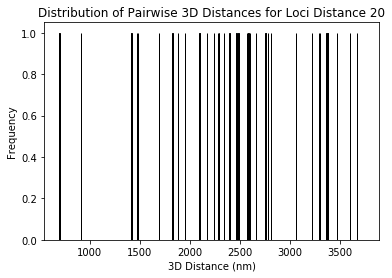

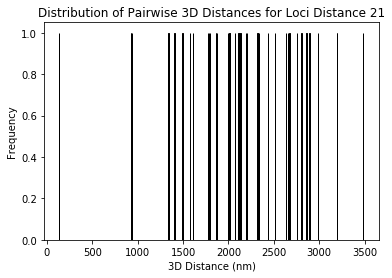

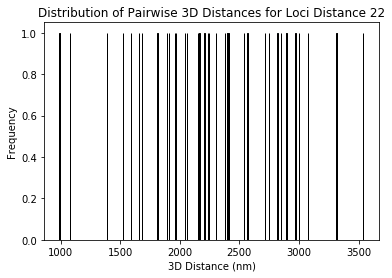

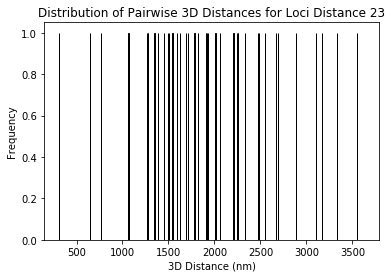

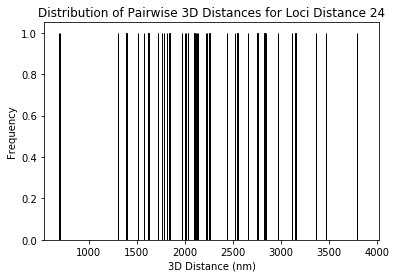

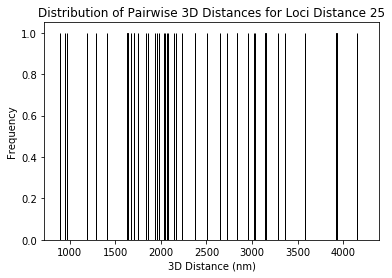

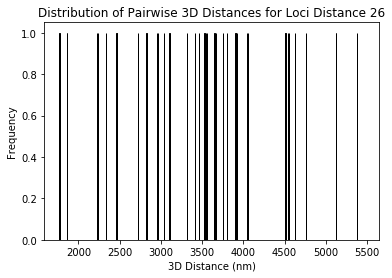

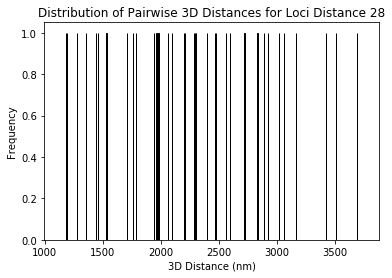

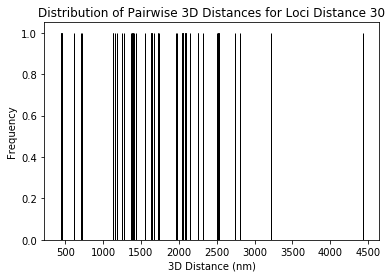

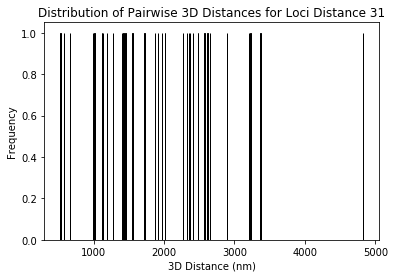

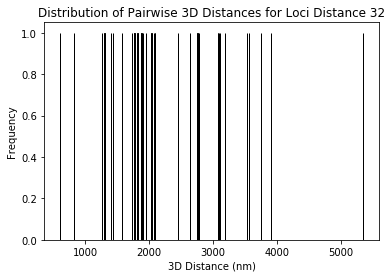

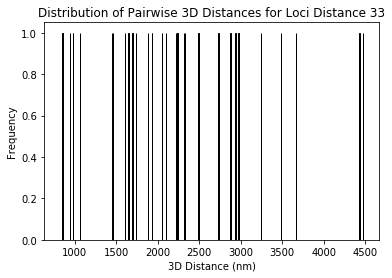

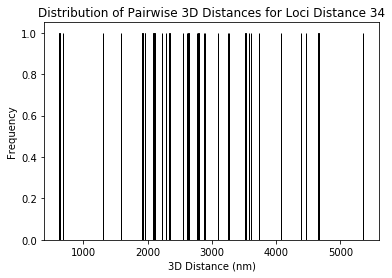

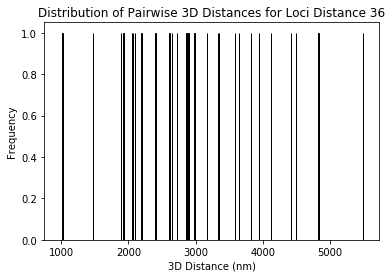

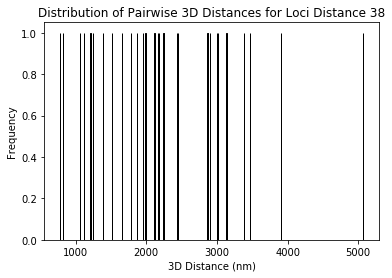

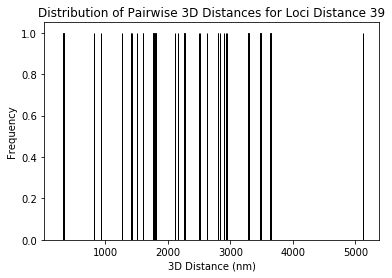

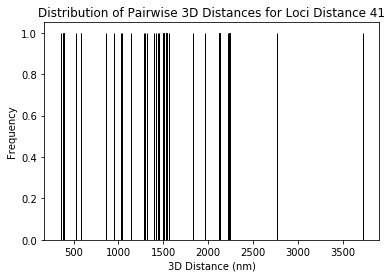

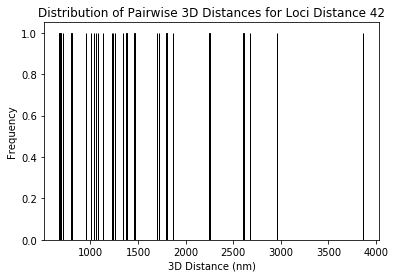

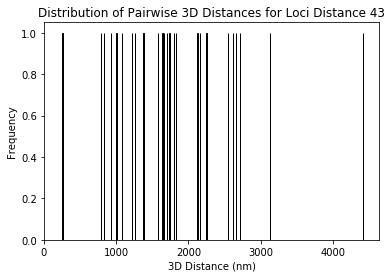

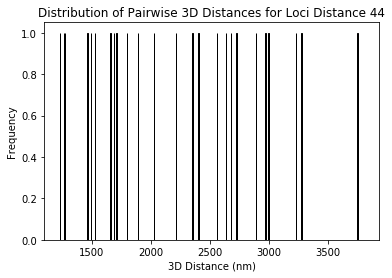

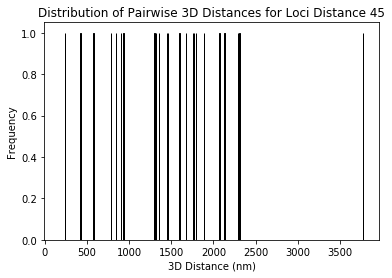

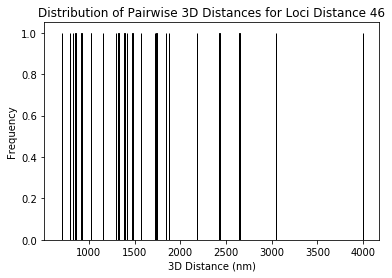

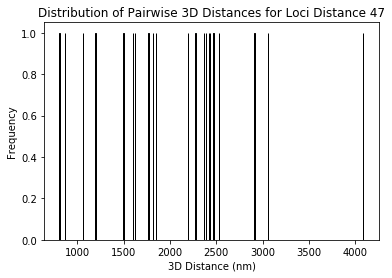

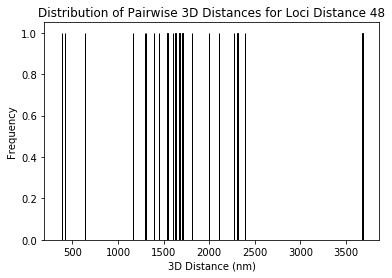

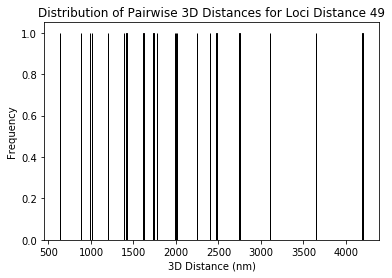

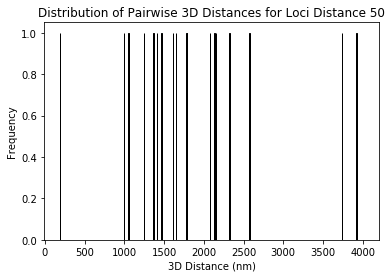

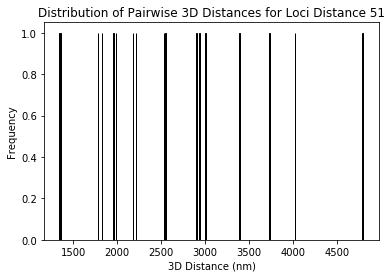

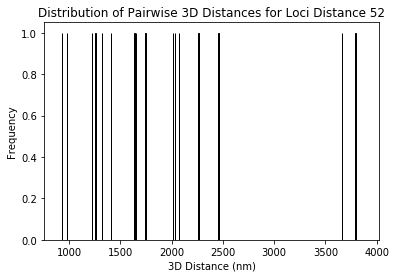

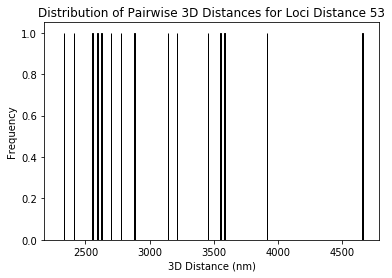

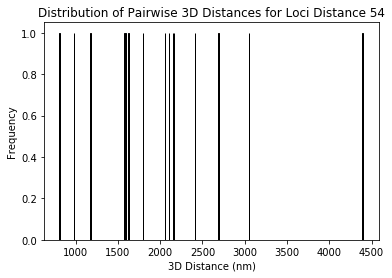

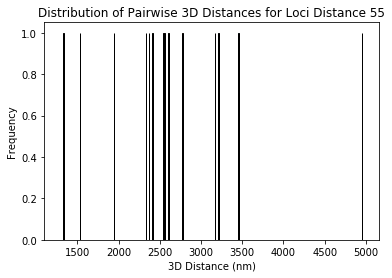

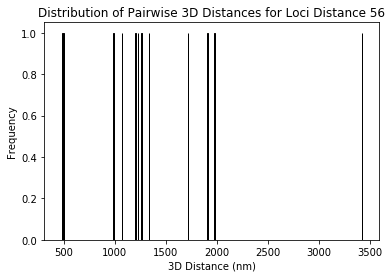

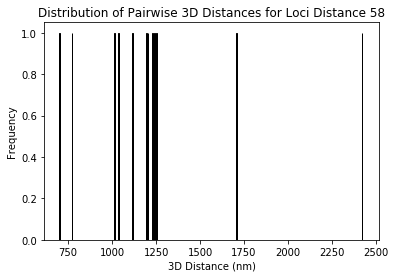

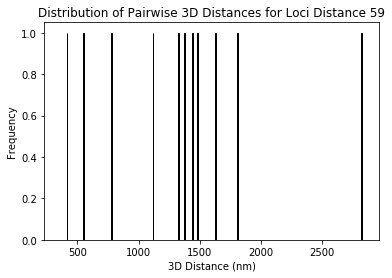

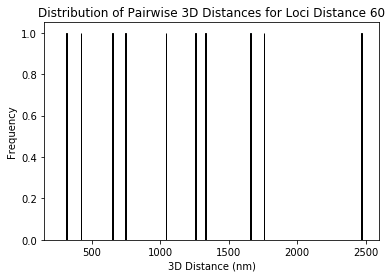

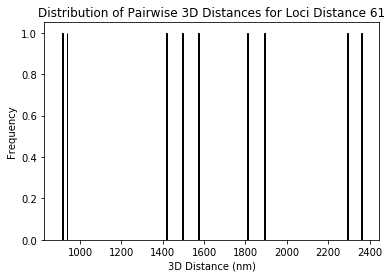

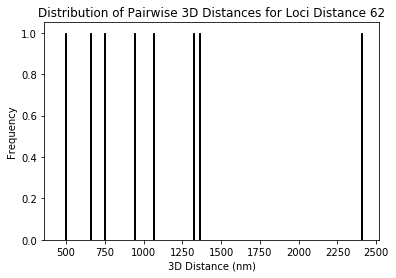

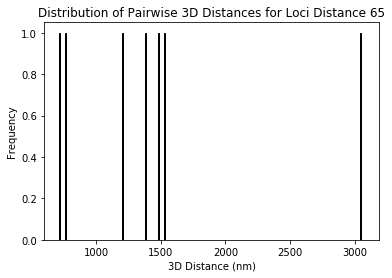

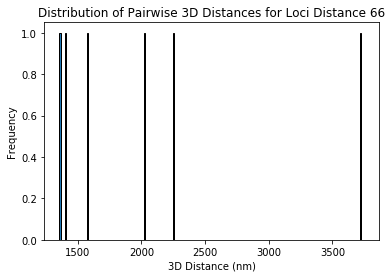

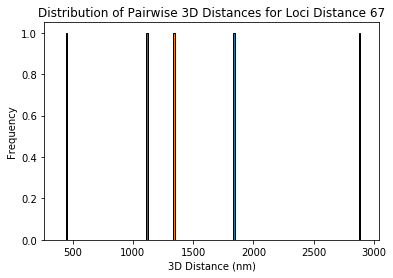

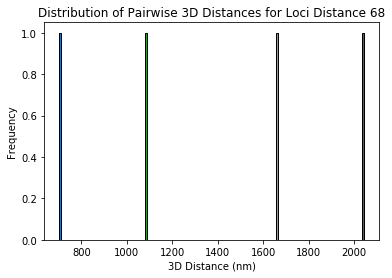

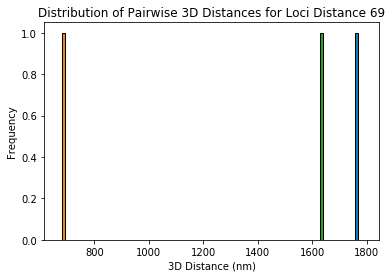

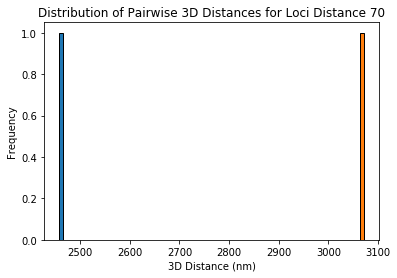

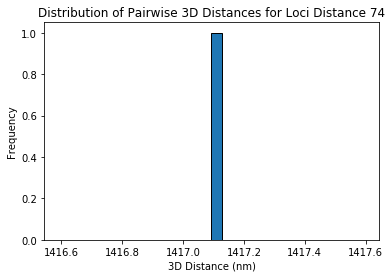

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your DataFrame here
# transformed_distances_1_1_1 = ...

# Iterate over the columns and create histograms for non-NaN values
for column in transformed_distances_1_1_1.columns:
    data = transformed_distances_1_1_1[column].dropna()
    numeric_data = data[data.apply(lambda x: isinstance(x, (int, float)))]  # Filter out non-numeric entries

    if not numeric_data.empty:
        plt.hist(numeric_data, bins=30, edgecolor='black')
        plt.xlabel('3D Distance (nm)')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Pairwise 3D Distances for {column}')
        plt.show()


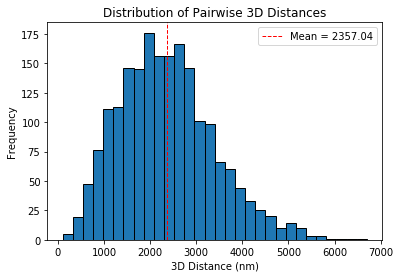

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your DataFrame here
# transformed_distances_1_1_1 = ...

# Combine all data from different columns into a single dataset
all_data = transformed_distances_1_1_1.values.flatten()
numeric_data = [value for value in all_data if pd.notna(value) and isinstance(value, (int, float))]

# Calculate the mean value
mean_value = np.mean(numeric_data)

# Create a histogram for the combined dataset
plt.hist(numeric_data, bins=30, edgecolor='black')
plt.xlabel('3D Distance (nm)')
plt.ylabel('Frequency')
plt.title('Distribution of Pairwise 3D Distances')

# Display the mean value on the plot
plt.axvline(x=mean_value, color='r', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')
plt.legend()

plt.show()


In [ ]:
a =